In [1]:
# imports & tweaks
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, time
import pathlib
import os
import cv2
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize'] = (8,6)
sns.set_style('darkgrid')
sns.set_context('talk')
sns.set_style({'font.sans-serif':['Verdana','Arial','Calibri','DejaVu Sans']})
%matplotlib inline

# NOTE: Always use a seed for random number generators, so you get same results across runs
# you can use any number as the seed 
seed = 123
np.random.seed(seed)

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

# Make sure that we have the correct version
# Expected result: '2.0.0-beta1'
tf.__version__

'2.0.0-beta1'

In [3]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical

In [4]:
(train_digits, train_labels), (test_digits, test_labels) = load_data()
train_digits.shape, train_labels.shape, test_digits.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
mnist_features = np.vstack([train_digits,test_digits])
mnist_labels = np.hstack([train_labels,test_labels])
print(mnist_labels)

[5 0 4 ... 4 5 6]


Notice that we have 60,000 images in the training set & 10,000 images in the test set. Let's randomly pick `14 images` from the `train_digits` set and see how they look.

In [6]:
rand_14 = np.random.randint(0, train_digits.shape[0],14)
sample_digits = mnist_features[rand_14]
sample_labels = mnist_labels[rand_14]

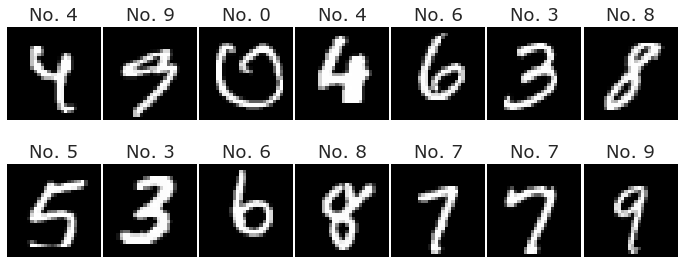

In [7]:
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.01}, squeeze=True)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()

In [8]:
data_source = pathlib.Path('data-cleaned')

In [9]:
from collections import Counter


# Find all labels
labels = [x.name for x in data_source.glob('*') if x.is_dir()]
label_names = sorted(item.name for item in data_source.glob('*/') if item.is_dir())
print('all labels:', label_names)

# Find all image's path
all_image_paths = list(data_source.glob("*/*"))
all_image_paths = [str(path) for path in all_image_paths if path.is_file()]

# Find all image's labels
label_to_index = dict((name, index) for index, name in enumerate(label_names))
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

# Count #image each class
count = Counter()

for label in all_image_labels:
  count[label_names[label]] += 1
  
count

all labels: ['0', '1', '2']


Counter({'0': 33997, '1': 25112, '2': 3251})

In [10]:
all_images = [str(x) for x in data_source.glob('*/*') if x.parent.name in label_names and x.is_file()]

In [12]:
operators_features = []
operators_labels = []

for image in all_images:
  label = image.rsplit('/')[1]
  img = cv2.imread(image)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = img.reshape(28, 28)
  img = np.asarray( img, dtype="uint8" )
  img = img.ravel()
  print(image)
  operators_features.append(img)
  operators_labels.append(label)

data-cleaned/0/exp14801.jpg
data-cleaned/0/exp1673.jpg
data-cleaned/0/exp53592.jpg
data-cleaned/0/exp80912.jpg
data-cleaned/0/-_34501.jpg
data-cleaned/0/exp43959.jpg
data-cleaned/0/exp75233.jpg
data-cleaned/0/-_99293.jpg
data-cleaned/0/-_24712.jpg
data-cleaned/0/exp28120.jpg
data-cleaned/0/exp27213.jpg
data-cleaned/0/-_28128.jpg
data-cleaned/0/exp38333.jpg
data-cleaned/0/exp71055.jpg
data-cleaned/0/exp77424.jpg
data-cleaned/0/-_26105.jpg
data-cleaned/0/exp31471.jpg
data-cleaned/0/exp60158.jpg
data-cleaned/0/exp78717.jpg
data-cleaned/0/exp29558.jpg
data-cleaned/0/-_60636.jpg
data-cleaned/0/exp31317.jpg
data-cleaned/0/-_78079.jpg
data-cleaned/0/-_19493.jpg
data-cleaned/0/exp67151.jpg
data-cleaned/0/exp38455.jpg
data-cleaned/0/exp18785.jpg
data-cleaned/0/exp30009.jpg
data-cleaned/0/exp16970.jpg
data-cleaned/0/exp28646.jpg
data-cleaned/0/-_62021.jpg
data-cleaned/0/exp33500.jpg
data-cleaned/0/exp74893.jpg
data-cleaned/0/-_72232.jpg
data-cleaned/0/-_13800.jpg
data-cleaned/0/exp96816.jpg
data

data-cleaned/0/exp21528.jpg
data-cleaned/0/exp16384.jpg
data-cleaned/0/-_100359.jpg
data-cleaned/0/exp29174.jpg
data-cleaned/0/-_77766.jpg
data-cleaned/0/exp59487.jpg
data-cleaned/0/exp76464.jpg
data-cleaned/0/exp4455.jpg
data-cleaned/0/exp39373.jpg
data-cleaned/0/exp95927.jpg
data-cleaned/0/-_56964.jpg
data-cleaned/0/-_21534.jpg
data-cleaned/0/exp78449.jpg
data-cleaned/0/-_49844.jpg
data-cleaned/0/exp60206.jpg
data-cleaned/0/-_63707.jpg
data-cleaned/0/-_35541.jpg
data-cleaned/0/exp64060.jpg
data-cleaned/0/exp15699.jpg
data-cleaned/0/-_113457.jpg
data-cleaned/0/exp14587.jpg
data-cleaned/0/-_9370.jpg
data-cleaned/0/exp24322.jpg
data-cleaned/0/-_13586.jpg
data-cleaned/0/exp8509.jpg
data-cleaned/0/exp12848.jpg
data-cleaned/0/-_34139.jpg
data-cleaned/0/-_35227.jpg
data-cleaned/0/exp22753.jpg
data-cleaned/0/exp12690.jpg
data-cleaned/0/exp45910.jpg
data-cleaned/0/exp74515.jpg
data-cleaned/0/exp17930.jpg
data-cleaned/0/-_77014.jpg
data-cleaned/0/exp11399.jpg
data-cleaned/0/exp2742.jpg
data-cl

data-cleaned/0/exp6733.jpg
data-cleaned/0/exp5212.jpg
data-cleaned/0/exp77223.jpg
data-cleaned/0/-_41941.jpg
data-cleaned/0/exp3663.jpg
data-cleaned/0/-_102003.jpg
data-cleaned/0/exp33461.jpg
data-cleaned/0/exp42298.jpg
data-cleaned/0/exp62148.jpg
data-cleaned/0/exp1074.jpg
data-cleaned/0/exp89857.jpg
data-cleaned/0/exp98782.jpg
data-cleaned/0/exp101192.jpg
data-cleaned/0/-_14968.jpg
data-cleaned/0/exp63530.jpg
data-cleaned/0/exp1712.jpg
data-cleaned/0/-_104314.jpg
data-cleaned/0/exp34468.jpg
data-cleaned/0/exp3105.jpg
data-cleaned/0/exp47486.jpg
data-cleaned/0/-_59868.jpg
data-cleaned/0/exp67756.jpg
data-cleaned/0/exp60039.jpg
data-cleaned/0/exp5574.jpg
data-cleaned/0/exp77545.jpg
data-cleaned/0/exp31510.jpg
data-cleaned/0/-_67992.jpg
data-cleaned/0/-_30612.jpg
data-cleaned/0/exp28055.jpg
data-cleaned/0/exp37175.jpg
data-cleaned/0/-_66454.jpg
data-cleaned/0/exp71120.jpg
data-cleaned/0/exp3111.jpg
data-cleaned/0/-_69767.jpg
data-cleaned/0/exp20409.jpg
data-cleaned/0/exp67742.jpg
data-c

data-cleaned/0/-_71935.jpg
data-cleaned/0/exp46149.jpg
data-cleaned/0/exp26865.jpg
data-cleaned/0/exp85102.jpg
data-cleaned/0/exp18035.jpg
data-cleaned/0/-_109787.jpg
data-cleaned/0/exp61290.jpg
data-cleaned/0/exp10469.jpg
data-cleaned/0/exp67839.jpg
data-cleaned/0/-_30969.jpg
data-cleaned/0/exp16018.jpg
data-cleaned/0/-_62949.jpg
data-cleaned/0/-_88348.jpg
data-cleaned/0/exp53544.jpg
data-cleaned/0/exp88340.jpg
data-cleaned/0/exp43757.jpg
data-cleaned/0/-_42441.jpg
data-cleaned/0/exp45326.jpg
data-cleaned/0/exp15505.jpg
data-cleaned/0/exp88354.jpg
data-cleaned/0/exp43743.jpg
data-cleaned/0/exp80708.jpg
data-cleaned/0/exp1869.jpg
data-cleaned/0/exp49508.jpg
data-cleaned/0/exp17312.jpg
data-cleaned/0/exp56428.jpg
data-cleaned/0/exp21878.jpg
data-cleaned/0/exp11763.jpg
data-cleaned/0/-_16004.jpg
data-cleaned/0/exp70389.jpg
data-cleaned/0/-_84566.jpg
data-cleaned/0/exp76920.jpg
data-cleaned/0/exp47243.jpg
data-cleaned/0/exp19459.jpg
data-cleaned/0/-_40524.jpg
data-cleaned/0/exp83567.jpg
d

data-cleaned/0/-_47077.jpg
data-cleaned/0/exp84034.jpg
data-cleaned/0/-_68094.jpg
data-cleaned/0/exp102062.jpg
data-cleaned/0/exp26495.jpg
data-cleaned/0/exp11239.jpg
data-cleaned/0/exp40710.jpg
data-cleaned/0/exp59241.jpg
data-cleaned/0/-_36856.jpg
data-cleaned/0/exp92656.jpg
data-cleaned/0/-_60557.jpg
data-cleaned/0/exp29639.jpg
data-cleaned/0/-_26502.jpg
data-cleaned/0/exp31076.jpg
data-cleaned/0/exp92911.jpg
data-cleaned/0/-_39422.jpg
data-cleaned/0/-_67238.jpg
data-cleaned/0/-_109356.jpg
data-cleaned/0/-_5213.jpg
data-cleaned/0/-_20173.jpg
data-cleaned/0/-_79006.jpg
data-cleaned/0/exp28527.jpg
data-cleaned/0/exp19922.jpg
data-cleaned/0/exp88949.jpg
data-cleaned/0/-_88941.jpg
data-cleaned/0/exp54822.jpg
data-cleaned/0/exp12877.jpg
data-cleaned/0/exp23472.jpg
data-cleaned/0/-_7404.jpg
data-cleaned/0/-_64731.jpg
data-cleaned/0/exp88791.jpg
data-cleaned/0/exp100932.jpg
data-cleaned/0/exp35210.jpg
data-cleaned/0/-_35218.jpg
data-cleaned/0/exp98582.jpg
data-cleaned/0/-_45927.jpg
data-cl

data-cleaned/0/exp57641.jpg
data-cleaned/0/exp28095.jpg
data-cleaned/0/-_92273.jpg
data-cleaned/0/exp51230.jpg
data-cleaned/0/exp17265.jpg
data-cleaned/0/exp67796.jpg
data-cleaned/0/exp4872.jpg
data-cleaned/0/-_16167.jpg
data-cleaned/0/exp77585.jpg
data-cleaned/0/exp40329.jpg
data-cleaned/0/exp83362.jpg
data-cleaned/0/exp51224.jpg
data-cleaned/0/-_78866.jpg
data-cleaned/0/-_52725.jpg
data-cleaned/0/exp45251.jpg
data-cleaned/0/exp13017.jpg
data-cleaned/0/exp55042.jpg
data-cleaned/0/exp96009.jpg
data-cleaned/0/-_74084.jpg
data-cleaned/0/exp15466.jpg
data-cleaned/0/exp98742.jpg
data-cleaned/0/-_13779.jpg
data-cleaned/0/exp91000.jpg
data-cleaned/0/exp71692.jpg
data-cleaned/0/exp26912.jpg
data-cleaned/0/exp18624.jpg
data-cleaned/0/exp57133.jpg
data-cleaned/0/exp105452.jpg
data-cleaned/0/-_108288.jpg
data-cleaned/0/exp26721.jpg
data-cleaned/0/exp18817.jpg
data-cleaned/0/exp77208.jpg
data-cleaned/0/exp3890.jpg
data-cleaned/0/-_37624.jpg
data-cleaned/0/exp4127.jpg
data-cleaned/0/exp79225.jpg
d

data-cleaned/0/exp68062.jpg
data-cleaned/0/-_39543.jpg
data-cleaned/0/-_106104.jpg
data-cleaned/0/exp38655.jpg
data-cleaned/0/-_30201.jpg
data-cleaned/0/exp28446.jpg
data-cleaned/0/-_88820.jpg
data-cleaned/0/exp8457.jpg
data-cleaned/0/exp33700.jpg
data-cleaned/0/exp62229.jpg
data-cleaned/0/exp7764.jpg
data-cleaned/0/-_72032.jpg
data-cleaned/0/-_44580.jpg
data-cleaned/0/exp73324.jpg
data-cleaned/0/exp33714.jpg
data-cleaned/0/exp65552.jpg
data-cleaned/0/exp45682.jpg
data-cleaned/0/exp54957.jpg
data-cleaned/0/exp1301.jpg
data-cleaned/0/exp22619.jpg
data-cleaned/0/-_103068.jpg
data-cleaned/0/exp86811.jpg
data-cleaned/0/exp5167.jpg
data-cleaned/0/exp31103.jpg
data-cleaned/0/exp21310.jpg
data-cleaned/0/exp2608.jpg
data-cleaned/0/exp69368.jpg
data-cleaned/0/-_69360.jpg
data-cleaned/0/exp29994.jpg
data-cleaned/0/exp56198.jpg
data-cleaned/0/exp4279.jpg
data-cleaned/0/exp28452.jpg
data-cleaned/0/exp84960.jpg
data-cleaned/0/-_20760.jpg
data-cleaned/0/exp71241.jpg
data-cleaned/0/-_5400.jpg
data-cl

data-cleaned/0/exp29774.jpg
data-cleaned/0/exp51817.jpg
data-cleaned/0/-_108105.jpg
data-cleaned/0/-_68046.jpg
data-cleaned/0/-_70609.jpg
data-cleaned/0/exp16584.jpg
data-cleaned/0/exp66077.jpg
data-cleaned/0/exp61718.jpg
data-cleaned/0/exp4255.jpg
data-cleaned/0/-_110986.jpg
data-cleaned/0/exp26453.jpg
data-cleaned/0/exp67369.jpg
data-cleaned/0/exp2624.jpg
data-cleaned/0/exp22635.jpg
data-cleaned/0/exp15099.jpg
data-cleaned/0/exp90087.jpg
data-cleaned/0/-_64668.jpg
data-cleaned/0/exp9771.jpg
data-cleaned/0/exp32426.jpg
data-cleaned/0/exp6442.jpg
data-cleaned/0/exp33738.jpg
data-cleaned/0/-_62219.jpg
data-cleaned/0/exp24244.jpg
data-cleaned/0/exp72002.jpg
data-cleaned/0/-_65210.jpg
data-cleaned/0/exp63669.jpg
data-cleaned/0/exp64106.jpg
data-cleaned/0/-_73472.jpg
data-cleaned/0/-_21452.jpg
data-cleaned/0/exp2142.jpg
data-cleaned/0/exp26335.jpg
data-cleaned/0/exp11599.jpg
data-cleaned/0/-_77614.jpg
data-cleaned/0/exp29006.jpg
data-cleaned/0/-_27023.jpg
data-cleaned/0/-_109569.jpg
data-c

data-cleaned/0/-_102945.jpg
data-cleaned/0/exp14740.jpg
data-cleaned/0/-_91756.jpg
data-cleaned/0/-_34498.jpg
data-cleaned/0/exp6091.jpg
data-cleaned/0/exp98008.jpg
data-cleaned/0/exp90454.jpg
data-cleaned/0/-_102951.jpg
data-cleaned/0/exp14754.jpg
data-cleaned/0/exp73917.jpg
data-cleaned/0/-_13033.jpg
data-cleaned/0/exp1926.jpg
data-cleaned/0/exp21937.jpg
data-cleaned/0/exp48981.jpg
data-cleaned/0/exp59654.jpg
data-cleaned/0/exp16143.jpg
data-cleaned/0/exp19270.jpg
data-cleaned/0/-_26088.jpg
data-cleaned/0/-_57671.jpg
data-cleaned/0/exp102477.jpg
data-cleaned/0/exp5598.jpg
data-cleaned/0/exp3857.jpg
data-cleaned/0/-_83420.jpg
data-cleaned/0/exp37833.jpg
data-cleaned/0/exp21089.jpg
data-cleaned/0/exp16625.jpg
data-cleaned/0/exp19516.jpg
data-cleaned/0/exp667.jpg
data-cleaned/0/exp92525.jpg
data-cleaned/0/exp18608.jpg
data-cleaned/0/exp99470.jpg
data-cleaned/0/-_33485.jpg
data-cleaned/0/-_13755.jpg
data-cleaned/0/-_74916.jpg
data-cleaned/0/exp14032.jpg
data-cleaned/0/exp13985.jpg
data-c

data-cleaned/0/exp46365.jpg
data-cleaned/0/exp19661.jpg
data-cleaned/0/exp61902.jpg
data-cleaned/0/exp17894.jpg
data-cleaned/0/exp38877.jpg
data-cleaned/0/exp54761.jpg
data-cleaned/0/-_54769.jpg
data-cleaned/0/-_15053.jpg
data-cleaned/0/-_45664.jpg
data-cleaned/0/-_22827.jpg
data-cleaned/0/-_8874.jpg
data-cleaned/0/exp63873.jpg
data-cleaned/0/-_15735.jpg
data-cleaned/0/exp22191.jpg
data-cleaned/0/exp80530.jpg
data-cleaned/0/-_106840.jpg
data-cleaned/0/exp83039.jpg
data-cleaned/0/exp21498.jpg
data-cleaned/0/exp49730.jpg
data-cleaned/0/-_18211.jpg
data-cleaned/0/exp92134.jpg
data-cleaned/0/exp5837.jpg
data-cleaned/0/-_85440.jpg
data-cleaned/0/exp30595.jpg
data-cleaned/0/exp68926.jpg
data-cleaned/0/-_11547.jpg
data-cleaned/0/exp102714.jpg
data-cleaned/0/exp10889.jpg
data-cleaned/0/-_92128.jpg
data-cleaned/0/exp262.jpg
data-cleaned/0/exp5823.jpg
data-cleaned/0/exp59537.jpg
data-cleaned/0/exp10651.jpg
data-cleaned/0/-_41370.jpg
data-cleaned/0/exp82333.jpg
data-cleaned/0/exp56604.jpg
data-cl

data-cleaned/0/exp104603.jpg
data-cleaned/0/exp19475.jpg
data-cleaned/0/exp93758.jpg
data-cleaned/0/-_47267.jpg
data-cleaned/0/exp84224.jpg
data-cleaned/0/exp37950.jpg
data-cleaned/0/exp102272.jpg
data-cleaned/0/exp94037.jpg
data-cleaned/0/exp3934.jpg
data-cleaned/0/-_43029.jpg
data-cleaned/0/exp98625.jpg
data-cleaned/0/-_74685.jpg
data-cleaned/0/-_105813.jpg
data-cleaned/0/exp90279.jpg
data-cleaned/0/exp15267.jpg
data-cleaned/0/-_44746.jpg
data-cleaned/0/-_86413.jpg
data-cleaned/0/-_14171.jpg
data-cleaned/0/exp32800.jpg
data-cleaned/0/exp74855.jpg
data-cleaned/0/exp65780.jpg
data-cleaned/0/exp55643.jpg
data-cleaned/0/exp44996.jpg
data-cleaned/0/exp8691.jpg
data-cleaned/0/-_165.jpg
data-cleaned/0/exp59079.jpg
data-cleaned/0/-_66281.jpg
data-cleaned/0/exp18743.jpg
data-cleaned/0/exp26875.jpg
data-cleaned/0/-_111866.jpg
data-cleaned/0/-_11009.jpg
data-cleaned/0/-_94017.jpg
data-cleaned/0/exp37978.jpg
data-cleaned/0/-_40246.jpg
data-cleaned/0/exp30971.jpg
data-cleaned/0/-_30979.jpg
data-c

data-cleaned/0/exp52528.jpg
data-cleaned/0/-_14575.jpg
data-cleaned/0/-_44342.jpg
data-cleaned/0/-_87309.jpg
data-cleaned/0/exp97112.jpg
data-cleaned/0/exp54159.jpg
data-cleaned/0/exp32753.jpg
data-cleaned/0/exp23886.jpg
data-cleaned/0/exp9404.jpg
data-cleaned/0/-_105740.jpg
data-cleaned/0/exp69031.jpg
data-cleaned/0/-_111735.jpg
data-cleaned/0/exp66302.jpg
data-cleaned/0/exp20357.jpg
data-cleaned/0/exp27438.jpg
data-cleaned/0/exp93823.jpg
data-cleaned/0/-_77207.jpg
data-cleaned/0/exp21049.jpg
data-cleaned/0/exp41965.jpg
data-cleaned/0/exp2551.jpg
data-cleaned/0/exp68449.jpg
data-cleaned/0/-_5981.jpg
data-cleaned/0/-_77561.jpg
data-cleaned/0/exp5558.jpg
data-cleaned/0/exp85927.jpg
data-cleaned/0/exp30622.jpg
data-cleaned/0/-_82098.jpg
data-cleaned/0/exp48941.jpg
data-cleaned/0/exp11834.jpg
data-cleaned/0/exp92283.jpg
data-cleaned/0/exp49487.jpg
data-cleaned/0/-_37145.jpg
data-cleaned/0/-_72419.jpg
data-cleaned/0/exp72411.jpg
data-cleaned/0/-_75376.jpg
data-cleaned/0/exp81599.jpg
data-c

data-cleaned/0/exp44439.jpg
data-cleaned/0/-_88749.jpg
data-cleaned/0/exp43356.jpg
data-cleaned/0/exp97661.jpg
data-cleaned/0/exp11376.jpg
data-cleaned/0/-_16411.jpg
data-cleaned/0/exp61849.jpg
data-cleaned/0/exp17707.jpg
data-cleaned/0/-_46226.jpg
data-cleaned/0/-_92711.jpg
data-cleaned/0/exp18434.jpg
data-cleaned/0/exp96557.jpg
data-cleaned/0/exp64919.jpg
data-cleaned/0/exp13549.jpg
data-cleaned/0/exp9808.jpg
data-cleaned/0/-_45707.jpg
data-cleaned/0/exp33841.jpg
data-cleaned/0/exp15138.jpg
data-cleaned/0/exp7825.jpg
data-cleaned/0/exp44411.jpg
data-cleaned/0/exp88769.jpg
data-cleaned/0/exp32587.jpg
data-cleaned/0/exp80335.jpg
data-cleaned/0/-_97641.jpg
data-cleaned/0/-_48223.jpg
data-cleaned/0/exp2785.jpg
data-cleaned/0/-_29811.jpg
data-cleaned/0/exp473.jpg
data-cleaned/0/exp10040.jpg
data-cleaned/0/exp41569.jpg
data-cleaned/0/exp4492.jpg
data-cleaned/0/exp82244.jpg
data-cleaned/0/exp31930.jpg
data-cleaned/0/exp36087.jpg
data-cleaned/0/exp50302.jpg
data-cleaned/0/-_68695.jpg
data-cl

data-cleaned/0/-_113094.jpg
data-cleaned/0/exp8874.jpg
data-cleaned/0/exp25399.jpg
data-cleaned/0/exp12535.jpg
data-cleaned/0/exp23930.jpg
data-cleaned/0/-_26698.jpg
data-cleaned/0/-_83556.jpg
data-cleaned/0/-_68291.jpg
data-cleaned/0/exp28865.jpg
data-cleaned/0/-_4297.jpg
data-cleaned/0/exp51418.jpg
data-cleaned/0/exp26848.jpg
data-cleaned/0/exp69187.jpg
data-cleaned/0/exp46164.jpg
data-cleaned/0/exp39968.jpg
data-cleaned/0/exp79394.jpg
data-cleaned/0/exp30794.jpg
data-cleaned/0/exp10444.jpg
data-cleaned/0/exp92335.jpg
data-cleaned/0/exp76919.jpg
data-cleaned/0/exp4928.jpg
data-cleaned/0/-_48627.jpg
data-cleaned/0/-_69831.jpg
data-cleaned/0/exp85891.jpg
data-cleaned/0/-_31482.jpg
data-cleaned/0/exp83238.jpg
data-cleaned/0/exp101008.jpg
data-cleaned/0/-_80739.jpg
data-cleaned/0/exp24939.jpg
data-cleaned/0/-_88365.jpg
data-cleaned/0/exp86340.jpg
data-cleaned/0/exp52677.jpg
data-cleaned/0/exp100316.jpg
data-cleaned/0/-_33295.jpg
data-cleaned/0/exp23065.jpg
data-cleaned/0/-_89090.jpg
data

data-cleaned/0/exp33946.jpg
data-cleaned/0/exp23599.jpg
data-cleaned/0/exp14335.jpg
data-cleaned/0/-_12994.jpg
data-cleaned/0/exp42173.jpg
data-cleaned/0/-_54719.jpg
data-cleaned/0/-_98461.jpg
data-cleaned/0/exp87549.jpg
data-cleaned/0/exp22687.jpg
data-cleaned/0/exp90035.jpg
data-cleaned/0/-_53076.jpg
data-cleaned/0/exp7936.jpg
data-cleaned/0/-_48330.jpg
data-cleaned/0/-_93534.jpg
data-cleaned/0/exp2696.jpg
data-cleaned/0/exp48338.jpg
data-cleaned/0/-_11245.jpg
data-cleaned/0/exp94253.jpg
data-cleaned/0/exp30283.jpg
data-cleaned/0/exp92622.jpg
data-cleaned/0/exp560.jpg
data-cleaned/0/exp46473.jpg
data-cleaned/0/exp104301.jpg
data-cleaned/0/exp31823.jpg
data-cleaned/0/exp82357.jpg
data-cleaned/0/exp68956.jpg
data-cleaned/0/exp10635.jpg
data-cleaned/0/-_89.jpg
data-cleaned/0/exp16244.jpg
data-cleaned/0/-_15745.jpg
data-cleaned/0/-_87227.jpg
data-cleaned/0/-_99019.jpg
data-cleaned/0/exp15995.jpg
data-cleaned/0/exp99011.jpg
data-cleaned/0/exp55369.jpg
data-cleaned/0/exp24590.jpg
data-clea

data-cleaned/0/-_23194.jpg
data-cleaned/0/exp22282.jpg
data-cleaned/0/-_62876.jpg
data-cleaned/0/exp19214.jpg
data-cleaned/0/-_31590.jpg
data-cleaned/0/exp11648.jpg
data-cleaned/0/exp31598.jpg
data-cleaned/0/exp30686.jpg
data-cleaned/0/exp165.jpg
data-cleaned/0/exp96069.jpg
data-cleaned/0/-_43648.jpg
data-cleaned/0/exp63590.jpg
data-cleaned/0/exp97377.jpg
data-cleaned/0/exp24803.jpg
data-cleaned/0/exp15406.jpg
data-cleaned/0/exp87164.jpg
data-cleaned/0/exp105354.jpg
data-cleaned/0/exp30876.jpg
data-cleaned/0/exp93111.jpg
data-cleaned/0/-_11668.jpg
data-cleaned/0/exp11660.jpg
data-cleaned/0/exp57635.jpg
data-cleaned/0/exp95560.jpg
data-cleaned/0/-_21973.jpg
data-cleaned/0/exp103725.jpg
data-cleaned/0/exp61387.jpg
data-cleaned/0/-_109690.jpg
data-cleaned/0/exp18122.jpg
data-cleaned/0/exp51522.jpg
data-cleaned/0/-_49365.jpg
data-cleaned/0/exp28787.jpg
data-cleaned/0/-_41739.jpg
data-cleaned/0/exp11106.jpg
data-cleaned/0/-_16661.jpg
data-cleaned/0/exp64599.jpg
data-cleaned/0/exp13711.jpg
d

data-cleaned/0/exp6426.jpg
data-cleaned/0/-_86851.jpg
data-cleaned/0/-_100501.jpg
data-cleaned/0/-_109243.jpg
data-cleaned/0/-_27709.jpg
data-cleaned/0/exp75721.jpg
data-cleaned/0/exp8423.jpg
data-cleaned/0/exp24208.jpg
data-cleaned/0/-_75729.jpg
data-cleaned/0/-_89592.jpg
data-cleaned/0/exp23567.jpg
data-cleaned/0/exp12962.jpg
data-cleaned/0/-_74437.jpg
data-cleaned/0/-_25678.jpg
data-cleaned/0/exp25670.jpg
data-cleaned/0/exp6368.jpg
data-cleaned/0/-_8144.jpg
data-cleaned/0/-_44292.jpg
data-cleaned/0/exp81878.jpg
data-cleaned/0/exp72728.jpg
data-cleaned/0/exp45184.jpg
data-cleaned/0/-_23209.jpg
data-cleaned/0/-_102470.jpg
data-cleaned/0/exp27067.jpg
data-cleaned/0/-_30513.jpg
data-cleaned/0/-_79675.jpg
data-cleaned/0/exp18297.jpg
data-cleaned/0/exp20708.jpg
data-cleaned/0/exp10813.jpg
data-cleaned/0/exp21416.jpg
data-cleaned/0/-_19181.jpg
data-cleaned/0/exp5661.jpg
data-cleaned/0/exp77650.jpg
data-cleaned/0/-_30507.jpg
data-cleaned/0/exp28340.jpg
data-cleaned/0/exp71235.jpg
data-clean

data-cleaned/0/exp81846.jpg
data-cleaned/0/-_22129.jpg
data-cleaned/0/-_113543.jpg
data-cleaned/0/exp22121.jpg
data-cleaned/0/-_78555.jpg
data-cleaned/0/-_77666.jpg
data-cleaned/0/exp26347.jpg
data-cleaned/0/exp2130.jpg
data-cleaned/0/-_108605.jpg
data-cleaned/0/-_79893.jpg
data-cleaned/0/-_56870.jpg
data-cleaned/0/exp21428.jpg
data-cleaned/0/exp95833.jpg
data-cleaned/0/-_70109.jpg
data-cleaned/0/-_10825.jpg
data-cleaned/0/exp16284.jpg
data-cleaned/0/exp39267.jpg
data-cleaned/0/exp76570.jpg
data-cleaned/0/exp82397.jpg
data-cleaned/0/exp30243.jpg
data-cleaned/0/exp76216.jpg
data-cleaned/0/exp10193.jpg
data-cleaned/0/-_3991.jpg
data-cleaned/0/exp71579.jpg
data-cleaned/0/-_108163.jpg
data-cleaned/0/exp70667.jpg
data-cleaned/0/-_107250.jpg
data-cleaned/0/exp94293.jpg
data-cleaned/0/exp60474.jpg
data-cleaned/0/exp5139.jpg
data-cleaned/0/exp26421.jpg
data-cleaned/0/exp12784.jpg
data-cleaned/0/-_25120.jpg
data-cleaned/0/exp74401.jpg
data-cleaned/0/-_103036.jpg
data-cleaned/0/exp9703.jpg
data-

data-cleaned/0/exp82744.jpg
data-cleaned/0/-_79298.jpg
data-cleaned/0/-_85023.jpg
data-cleaned/0/-_26944.jpg
data-cleaned/0/exp17549.jpg
data-cleaned/0/-_81245.jpg
data-cleaned/0/exp23834.jpg
data-cleaned/0/exp6785.jpg
data-cleaned/0/exp8970.jpg
data-cleaned/0/exp90340.jpg
data-cleaned/0/-_15356.jpg
data-cleaned/0/exp15438.jpg
data-cleaned/0/-_98072.jpg
data-cleaned/0/exp1954.jpg
data-cleaned/0/-_85745.jpg
data-cleaned/0/exp20483.jpg
data-cleaned/0/-_67918.jpg
data-cleaned/0/-_10548.jpg
data-cleaned/0/exp21945.jpg
data-cleaned/0/exp30690.jpg
data-cleaned/0/-_94648.jpg
data-cleaned/0/-_5933.jpg
data-cleaned/0/exp40377.jpg
data-cleaned/0/exp58538.jpg
data-cleaned/0/-_30840.jpg
data-cleaned/0/exp84453.jpg
data-cleaned/0/exp11892.jpg
data-cleaned/0/-_18100.jpg
data-cleaned/0/exp30684.jpg
data-cleaned/0/exp21951.jpg
data-cleaned/0/exp85981.jpg
data-cleaned/0/exp19216.jpg
data-cleaned/0/-_30854.jpg
data-cleaned/0/-_76801.jpg
data-cleaned/0/exp21789.jpg
data-cleaned/0/exp22280.jpg
data-cleane

data-cleaned/0/exp44266.jpg
data-cleaned/0/exp81884.jpg
data-cleaned/0/exp36196.jpg
data-cleaned/0/exp19175.jpg
data-cleaned/0/exp79859.jpg
data-cleaned/0/exp16246.jpg
data-cleaned/0/exp4583.jpg
data-cleaned/0/exp68954.jpg
data-cleaned/0/-_41316.jpg
data-cleaned/0/exp92146.jpg
data-cleaned/0/-_46479.jpg
data-cleaned/0/exp104303.jpg
data-cleaned/0/exp562.jpg
data-cleaned/0/exp36828.jpg
data-cleaned/0/exp30281.jpg
data-cleaned/0/-_58121.jpg
data-cleaned/0/-_11247.jpg
data-cleaned/0/-_48332.jpg
data-cleaned/0/exp19613.jpg
data-cleaned/0/-_47001.jpg
data-cleaned/0/-_93536.jpg
data-cleaned/0/exp50575.jpg
data-cleaned/0/exp22685.jpg
data-cleaned/0/exp33950.jpg
data-cleaned/0/-_53074.jpg
data-cleaned/0/exp97758.jpg
data-cleaned/0/exp80224.jpg
data-cleaned/0/-_97750.jpg
data-cleaned/0/exp13458.jpg
data-cleaned/0/exp86655.jpg
data-cleaned/0/exp29920.jpg
data-cleaned/0/exp51643.jpg
data-cleaned/0/-_29928.jpg
data-cleaned/0/-_36808.jpg
data-cleaned/0/exp95167.jpg
data-cleaned/0/-_60496.jpg
data-c

data-cleaned/0/exp60883.jpg
data-cleaned/0/exp71756.jpg
data-cleaned/0/-_46694.jpg
data-cleaned/0/-_20511.jpg
data-cleaned/0/exp71030.jpg
data-cleaned/0/-_76757.jpg
data-cleaned/0/exp27276.jpg
data-cleaned/0/-_3200.jpg
data-cleaned/0/exp26168.jpg
data-cleaned/0/-_85807.jpg
data-cleaned/0/exp39048.jpg
data-cleaned/0/-_68569.jpg
data-cleaned/0/exp73627.jpg
data-cleaned/0/-_104210.jpg
data-cleaned/0/exp63434.jpg
data-cleaned/0/-_54290.jpg
data-cleaned/0/exp33203.jpg
data-cleaned/0/exp8154.jpg
data-cleaned/0/exp96126.jpg
data-cleaned/0/exp24794.jpg
data-cleaned/0/exp73814.jpg
data-cleaned/0/exp13138.jpg
data-cleaned/0/-_24944.jpg
data-cleaned/0/exp88318.jpg
data-cleaned/0/-_98103.jpg
data-cleaned/0/-_91899.jpg
data-cleaned/0/exp97238.jpg
data-cleaned/0/exp78799.jpg
data-cleaned/0/exp94731.jpg
data-cleaned/0/-_57772.jpg
data-cleaned/0/exp19373.jpg
data-cleaned/0/exp30939.jpg
data-cleaned/0/exp46677.jpg
data-cleaned/0/-_78949.jpg
data-cleaned/0/exp104105.jpg
data-cleaned/0/exp10431.jpg
data-

data-cleaned/0/exp7139.jpg
data-cleaned/0/-_53879.jpg
data-cleaned/0/exp15824.jpg
data-cleaned/0/-_6026.jpg
data-cleaned/0/exp66612.jpg
data-cleaned/0/-_37333.jpg
data-cleaned/0/-_27120.jpg
data-cleaned/0/-_84847.jpg
data-cleaned/0/exp21559.jpg
data-cleaned/0/exp95942.jpg
data-cleaned/0/exp39316.jpg
data-cleaned/0/exp20653.jpg
data-cleaned/0/exp31986.jpg
data-cleaned/0/-_37327.jpg
data-cleaned/0/exp69535.jpg
data-cleaned/0/-_61161.jpg
data-cleaned/0/exp30440.jpg
data-cleaned/0/exp79726.jpg
data-cleaned/0/exp29111.jpg
data-cleaned/0/-_20883.jpg
data-cleaned/0/exp78438.jpg
data-cleaned/0/-_31756.jpg
data-cleaned/0/-_108760.jpg
data-cleaned/0/-_21545.jpg
data-cleaned/0/exp22044.jpg
data-cleaned/0/exp12187.jpg
data-cleaned/0/exp6233.jpg
data-cleaned/0/exp9100.jpg
data-cleaned/0/exp13299.jpg
data-cleaned/0/-_15838.jpg
data-cleaned/0/exp96287.jpg
data-cleaned/0/-_13291.jpg
data-cleaned/0/exp72673.jpg
data-cleaned/0/exp34626.jpg
data-cleaned/0/-_65461.jpg
data-cleaned/0/exp14290.jpg
data-clea

data-cleaned/0/exp61424.jpg
data-cleaned/0/exp39897.jpg
data-cleaned/0/exp28742.jpg
data-cleaned/0/-_56280.jpg
data-cleaned/0/-_93862.jpg
data-cleaned/0/exp38551.jpg
data-cleaned/0/-_81296.jpg
data-cleaned/0/exp6756.jpg
data-cleaned/0/exp9465.jpg
data-cleaned/0/exp90393.jpg
data-cleaned/0/-_22529.jpg
data-cleaned/0/-_73000.jpg
data-cleaned/0/exp2530.jpg
data-cleaned/0/exp37892.jpg
data-cleaned/0/exp83489.jpg
data-cleaned/0/exp30125.jpg
data-cleaned/0/exp27459.jpg
data-cleaned/0/exp20336.jpg
data-cleaned/0/exp69050.jpg
data-cleaned/0/-_111032.jpg
data-cleaned/0/-_5738.jpg
data-cleaned/0/exp11855.jpg
data-cleaned/0/exp69736.jpg
data-cleaned/0/exp30643.jpg
data-cleaned/0/-_78633.jpg
data-cleaned/0/exp5539.jpg
data-cleaned/0/-_108563.jpg
data-cleaned/0/-_68420.jpg
data-cleaned/0/exp68428.jpg
data-cleaned/0/exp70267.jpg
data-cleaned/0/-_113625.jpg
data-cleaned/0/exp22247.jpg
data-cleaned/0/exp25528.jpg
data-cleaned/0/exp72470.jpg
data-cleaned/0/exp22253.jpg
data-cleaned/0/-_113631.jpg
data-

data-cleaned/0/exp76951.jpg
data-cleaned/0/exp48667.jpg
data-cleaned/0/exp83270.jpg
data-cleaned/0/exp46892.jpg
data-cleaned/0/exp11712.jpg
data-cleaned/0/-_69879.jpg
data-cleaned/0/exp77497.jpg
data-cleaned/0/exp11074.jpg
data-cleaned/0/-_57029.jpg
data-cleaned/0/-_71950.jpg
data-cleaned/0/-_16713.jpg
data-cleaned/0/exp19428.jpg
data-cleaned/0/exp48101.jpg
data-cleaned/0/exp71780.jpg
data-cleaned/0/-_14104.jpg
data-cleaned/0/exp23978.jpg
data-cleaned/0/-_11054.jpg
data-cleaned/0/-_83536.jpg
data-cleaned/0/exp19400.jpg
data-cleaned/0/exp26828.jpg
data-cleaned/0/-_20289.jpg
data-cleaned/0/-_33593.jpg
data-cleaned/0/-_13643.jpg
data-cleaned/0/exp6839.jpg
data-cleaned/0/exp23788.jpg
data-cleaned/0/exp52171.jpg
data-cleaned/0/exp13893.jpg
data-cleaned/0/exp8814.jpg
data-cleaned/0/exp23950.jpg
data-cleaned/0/exp32685.jpg
data-cleaned/0/exp54266.jpg
data-cleaned/0/exp91884.jpg
data-cleaned/0/-_25497.jpg
data-cleaned/0/-_15554.jpg
data-cleaned/0/exp24959.jpg
data-cleaned/0/exp44075.jpg
data-c

data-cleaned/0/exp94530.jpg
data-cleaned/0/exp58648.jpg
data-cleaned/0/exp12027.jpg
data-cleaned/0/exp15748.jpg
data-cleaned/0/exp35498.jpg
data-cleaned/0/exp90756.jpg
data-cleaned/0/-_112698.jpg
data-cleaned/0/exp14456.jpg
data-cleaned/0/exp15990.jpg
data-cleaned/0/exp24595.jpg
data-cleaned/0/-_15998.jpg
data-cleaned/0/exp13339.jpg
data-cleaned/0/exp99014.jpg
data-cleaned/0/exp99772.jpg
data-cleaned/0/exp12999.jpg
data-cleaned/0/exp75902.jpg
data-cleaned/0/exp12741.jpg
data-cleaned/0/exp19614.jpg
data-cleaned/0/exp93539.jpg
data-cleaned/0/exp50572.jpg
data-cleaned/0/-_46318.jpg
data-cleaned/0/exp10156.jpg
data-cleaned/0/exp95148.jpg
data-cleaned/0/-_42156.jpg
data-cleaned/0/exp81115.jpg
data-cleaned/0/-_99752.jpg
data-cleaned/0/exp91306.jpg
data-cleaned/0/-_14310.jpg
data-cleaned/0/-_72095.jpg
data-cleaned/0/exp14318.jpg
data-cleaned/0/exp15006.jpg
data-cleaned/0/exp87564.jpg
data-cleaned/0/exp101532.jpg
data-cleaned/0/exp98444.jpg
data-cleaned/0/-_54734.jpg
data-cleaned/0/-_12761.jpg

data-cleaned/0/-_9841.jpg
data-cleaned/0/exp9498.jpg
data-cleaned/0/exp81277.jpg
data-cleaned/0/exp44895.jpg
data-cleaned/0/-_75498.jpg
data-cleaned/0/-_52027.jpg
data-cleaned/0/-_54456.jpg
data-cleaned/0/-_105910.jpg
data-cleaned/0/exp98726.jpg
data-cleaned/0/exp83460.jpg
data-cleaned/0/exp11102.jpg
data-cleaned/0/-_71826.jpg
data-cleaned/0/exp67094.jpg
data-cleaned/0/-_66382.jpg
data-cleaned/0/exp85011.jpg
data-cleaned/0/-_100868.jpg
data-cleaned/0/-_59172.jpg
data-cleaned/0/-_82776.jpg
data-cleaned/0/-_92203.jpg
data-cleaned/0/exp17215.jpg
data-cleaned/0/-_70286.jpg
data-cleaned/0/-_60095.jpg
data-cleaned/0/exp101136.jpg
data-cleaned/0/-_44123.jpg
data-cleaned/0/exp15402.jpg
data-cleaned/0/exp24807.jpg
data-cleaned/0/exp73787.jpg
data-cleaned/0/-_14714.jpg
data-cleaned/0/-_99356.jpg
data-cleaned/0/exp81511.jpg
data-cleaned/0/exp28782.jpg
data-cleaned/0/exp95203.jpg
data-cleaned/0/exp51527.jpg
data-cleaned/0/-_18649.jpg
data-cleaned/0/exp17572.jpg
data-cleaned/0/exp60922.jpg
data-cle

data-cleaned/0/-_29906.jpg
data-cleaned/0/-_17630.jpg
data-cleaned/0/exp2692.jpg
data-cleaned/0/-_48334.jpg
data-cleaned/0/exp19615.jpg
data-cleaned/0/-_97756.jpg
data-cleaned/0/exp7932.jpg
data-cleaned/0/exp22683.jpg
data-cleaned/0/-_105483.jpg
data-cleaned/0/-_14339.jpg
data-cleaned/0/exp14331.jpg
data-cleaned/0/-_91327.jpg
data-cleaned/0/-_8800.jpg
data-cleaned/0/-_81134.jpg
data-cleaned/0/exp96440.jpg
data-cleaned/0/-_88662.jpg
data-cleaned/0/exp106260.jpg
data-cleaned/0/-_105497.jpg
data-cleaned/0/exp23589.jpg
data-cleaned/0/exp14325.jpg
data-cleaned/0/-_22847.jpg
data-cleaned/0/exp96454.jpg
data-cleaned/0/-_8814.jpg
data-cleaned/0/exp56116.jpg
data-cleaned/0/exp10143.jpg
data-cleaned/0/-_18517.jpg
data-cleaned/0/exp3598.jpg
data-cleaned/0/exp20080.jpg
data-cleaned/0/-_19609.jpg
data-cleaned/0/-_11255.jpg
data-cleaned/0/exp26397.jpg
data-cleaned/0/-_47775.jpg
data-cleaned/0/exp50201.jpg
data-cleaned/0/exp19167.jpg
data-cleaned/0/exp5857.jpg
data-cleaned/0/-_56678.jpg
data-cleaned/

data-cleaned/0/exp82612.jpg
data-cleaned/0/exp56325.jpg
data-cleaned/0/exp10370.jpg
data-cleaned/0/exp58308.jpg
data-cleaned/0/exp3973.jpg
data-cleaned/0/exp40547.jpg
data-cleaned/0/exp94070.jpg
data-cleaned/0/-_94078.jpg
data-cleaned/0/exp37917.jpg
data-cleaned/0/exp41881.jpg
data-cleaned/0/exp28837.jpg
data-cleaned/0/exp31631.jpg
data-cleaned/0/-_100253.jpg
data-cleaned/0/exp83083.jpg
data-cleaned/0/exp60318.jpg
data-cleaned/0/-_79899.jpg
data-cleaned/0/-_39265.jpg
data-cleaned/0/-_16286.jpg
data-cleaned/0/exp93290.jpg
data-cleaned/0/-_109511.jpg
data-cleaned/0/exp28360.jpg
data-cleaned/0/-_82395.jpg
data-cleaned/0/exp84934.jpg
data-cleaned/0/-_68994.jpg
data-cleaned/0/exp61006.jpg
data-cleaned/0/exp79649.jpg
data-cleaned/0/-_90949.jpg
data-cleaned/0/-_104035.jpg
data-cleaned/0/exp42807.jpg
data-cleaned/0/exp25644.jpg
data-cleaned/0/-_97798.jpg
data-cleaned/0/exp9709.jpg
data-cleaned/0/exp35331.jpg
data-cleaned/0/exp87583.jpg
data-cleaned/0/exp12956.jpg
data-cleaned/0/-_62261.jpg
dat

data-cleaned/0/-_73740.jpg
data-cleaned/0/-_14903.jpg
data-cleaned/0/exp91915.jpg
data-cleaned/0/exp6016.jpg
data-cleaned/0/exp24604.jpg
data-cleaned/0/exp89196.jpg
data-cleaned/0/exp72442.jpg
data-cleaned/0/-_80804.jpg
data-cleaned/0/exp35709.jpg
data-cleaned/0/exp22275.jpg
data-cleaned/0/-_35701.jpg
data-cleaned/0/exp6002.jpg
data-cleaned/0/exp91901.jpg
data-cleaned/0/exp29320.jpg
data-cleaned/0/-_109897.jpg
data-cleaned/0/exp40396.jpg
data-cleaned/0/exp26013.jpg
data-cleaned/0/-_903.jpg
data-cleaned/0/-_21774.jpg
data-cleaned/0/-_4414.jpg
data-cleaned/0/exp70255.jpg
data-cleaned/0/-_71143.jpg
data-cleaned/0/exp192.jpg
data-cleaned/0/-_51293.jpg
data-cleaned/0/exp41088.jpg
data-cleaned/0/exp30671.jpg
data-cleaned/0/-_30679.jpg
data-cleaned/0/exp79517.jpg
data-cleaned/0/exp28758.jpg
data-cleaned/0/exp79271.jpg
data-cleaned/0/-_50833.jpg
data-cleaned/0/-_109129.jpg
data-cleaned/0/-_37670.jpg
data-cleaned/0/-_66359.jpg
data-cleaned/0/exp28980.jpg
data-cleaned/0/exp6764.jpg
data-cleaned/

data-cleaned/0/exp49199.jpg
data-cleaned/0/exp93483.jpg
data-cleaned/0/-_39476.jpg
data-cleaned/0/-_16495.jpg
data-cleaned/0/exp78344.jpg
data-cleaned/0/exp15194.jpg
data-cleaned/0/exp99810.jpg
data-cleaned/0/exp7889.jpg
data-cleaned/0/exp100966.jpg
data-cleaned/0/exp91294.jpg
data-cleaned/0/exp12823.jpg
data-cleaned/0/exp75660.jpg
data-cleaned/0/exp81087.jpg
data-cleaned/0/-_87561.jpg
data-cleaned/0/-_97772.jpg
data-cleaned/0/exp99757.jpg
data-cleaned/0/exp52340.jpg
data-cleaned/0/exp92602.jpg
data-cleaned/0/exp71599.jpg
data-cleaned/0/-_41452.jpg
data-cleaned/0/exp51891.jpg
data-cleaned/0/exp60494.jpg
data-cleaned/0/-_84068.jpg
data-cleaned/0/exp16264.jpg
data-cleaned/0/-_56890.jpg
data-cleaned/0/exp29094.jpg
data-cleaned/0/exp83069.jpg
data-cleaned/0/-_66953.jpg
data-cleaned/0/exp10615.jpg
data-cleaned/0/exp77856.jpg
data-cleaned/0/exp38199.jpg
data-cleaned/0/exp46453.jpg
data-cleaned/0/exp18249.jpg
data-cleaned/0/exp5867.jpg
data-cleaned/0/exp14473.jpg
data-cleaned/0/exp52426.jpg
d

data-cleaned/0/exp14840.jpg
data-cleaned/0/-_104234.jpg
data-cleaned/0/exp15586.jpg
data-cleaned/0/exp14698.jpg
data-cleaned/0/exp7243.jpg
data-cleaned/0/-_684.jpg
data-cleaned/0/-_11930.jpg
data-cleaned/0/-_70302.jpg
data-cleaned/0/exp31430.jpg
data-cleaned/0/exp5454.jpg
data-cleaned/0/exp69883.jpg
data-cleaned/0/exp104874.jpg
data-cleaned/0/exp29519.jpg
data-cleaned/0/-_29511.jpg
data-cleaned/0/-_110527.jpg
data-cleaned/0/-_67118.jpg
data-cleaned/0/exp37727.jpg
data-cleaned/0/exp10398.jpg
data-cleaned/0/-_76015.jpg
data-cleaned/0/-_87952.jpg
data-cleaned/0/exp33541.jpg
data-cleaned/0/-_13699.jpg
data-cleaned/0/exp65707.jpg
data-cleaned/0/-_72273.jpg
data-cleaned/0/exp23752.jpg
data-cleaned/0/exp35130.jpg
data-cleaned/0/-_104552.jpg
data-cleaned/0/exp73165.jpg
data-cleaned/0/-_8417.jpg
data-cleaned/0/exp96857.jpg
data-cleaned/0/-_12587.jpg
data-cleaned/0/-_29539.jpg
data-cleaned/0/-_21165.jpg
data-cleaned/0/exp70444.jpg
data-cleaned/0/-_68203.jpg
data-cleaned/0/exp20273.jpg
data-clean

data-cleaned/0/exp64960.jpg
data-cleaned/0/exp7684.jpg
data-cleaned/0/-_92740.jpg
data-cleaned/0/exp17756.jpg
data-cleaned/0/-_59357.jpg
data-cleaned/0/exp10039.jpg
data-cleaned/0/exp103262.jpg
data-cleaned/0/-_10031.jpg
data-cleaned/0/-_36948.jpg
data-cleaned/0/-_38965.jpg
data-cleaned/0/exp58041.jpg
data-cleaned/0/exp68182.jpg
data-cleaned/0/exp47161.jpg
data-cleaned/0/-_49150.jpg
data-cleaned/0/exp83889.jpg
data-cleaned/0/exp85220.jpg
data-cleaned/0/-_46263.jpg
data-cleaned/0/exp51717.jpg
data-cleaned/0/-_27689.jpg
data-cleaned/0/-_26597.jpg
data-cleaned/0/-_16454.jpg
data-cleaned/0/-_27851.jpg
data-cleaned/0/exp50409.jpg
data-cleaned/0/-_53108.jpg
data-cleaned/0/exp7848.jpg
data-cleaned/0/-_12632.jpg
data-cleaned/0/-_55579.jpg
data-cleaned/0/exp9865.jpg
data-cleaned/0/exp81720.jpg
data-cleaned/0/exp54109.jpg
data-cleaned/0/-_44312.jpg
data-cleaned/0/exp11455.jpg
data-cleaned/0/-_20858.jpg
data-cleaned/0/-_40174.jpg
data-cleaned/0/exp82229.jpg
data-cleaned/0/-_4826.jpg
data-cleaned/

data-cleaned/0/-_113629.jpg
data-cleaned/0/-_22243.jpg
data-cleaned/0/-_104355.jpg
data-cleaned/0/exp33346.jpg
data-cleaned/0/-_102724.jpg
data-cleaned/0/exp8011.jpg
data-cleaned/0/exp7322.jpg
data-cleaned/0/exp13096.jpg
data-cleaned/0/-_28008.jpg
data-cleaned/0/exp27333.jpg
data-cleaned/0/exp28000.jpg
data-cleaned/0/exp95581.jpg
data-cleaned/0/exp37120.jpg
data-cleaned/0/-_5734.jpg
data-cleaned/0/exp71175.jpg
data-cleaned/0/-_84484.jpg
data-cleaned/0/exp30897.jpg
data-cleaned/0/-_31559.jpg
data-cleaned/0/exp46901.jpg
data-cleaned/0/exp31551.jpg
data-cleaned/0/-_11689.jpg
data-cleaned/0/exp19752.jpg
data-cleaned/0/exp38944.jpg
data-cleaned/0/-_28587.jpg
data-cleaned/0/exp10010.jpg
data-cleaned/0/-_36961.jpg
data-cleaned/0/exp423.jpg
data-cleaned/0/exp9858.jpg
data-cleaned/0/exp96507.jpg
data-cleaned/0/exp99634.jpg
data-cleaned/0/exp74582.jpg
data-cleaned/0/exp12607.jpg
data-cleaned/0/exp15168.jpg
data-cleaned/0/exp33811.jpg
data-cleaned/0/-_33819.jpg
data-cleaned/0/-_15606.jpg
data-cle

data-cleaned/0/exp55160.jpg
data-cleaned/0/exp18060.jpg
data-cleaned/0/-_85639.jpg
data-cleaned/0/exp37083.jpg
data-cleaned/0/exp17353.jpg
data-cleaned/0/exp27290.jpg
data-cleaned/0/-_107927.jpg
data-cleaned/0/-_59752.jpg
data-cleaned/0/-_646.jpg
data-cleaned/0/exp83240.jpg
data-cleaned/0/exp102579.jpg
data-cleaned/0/-_100090.jpg
data-cleaned/0/exp68587.jpg
data-cleaned/0/exp93053.jpg
data-cleaned/0/exp30934.jpg
data-cleaned/0/-_36395.jpg
data-cleaned/0/exp93735.jpg
data-cleaned/0/-_19410.jpg
data-cleaned/0/exp3959.jpg
data-cleaned/0/exp31394.jpg
data-cleaned/0/exp18706.jpg
data-cleaned/0/exp26830.jpg
data-cleaned/0/exp20299.jpg
data-cleaned/0/exp74810.jpg
data-cleaned/0/exp91122.jpg
data-cleaned/0/-_23798.jpg
data-cleaned/0/exp33583.jpg
data-cleaned/0/-_9913.jpg
data-cleaned/0/-_13883.jpg
data-cleaned/0/exp96895.jpg
data-cleaned/0/exp6835.jpg
data-cleaned/0/-_99562.jpg
data-cleaned/0/exp81325.jpg
data-cleaned/0/-_105842.jpg
data-cleaned/0/exp8818.jpg
data-cleaned/0/-_22492.jpg
data-cl

data-cleaned/0/exp35337.jpg
data-cleaned/0/exp99963.jpg
data-cleaned/0/exp97796.jpg
data-cleaned/0/exp63171.jpg
data-cleaned/0/exp45808.jpg
data-cleaned/0/exp22893.jpg
data-cleaned/0/exp75713.jpg
data-cleaned/0/exp23555.jpg
data-cleaned/0/exp12950.jpg
data-cleaned/0/exp54905.jpg
data-cleaned/0/exp85392.jpg
data-cleaned/0/exp3544.jpg
data-cleaned/0/exp66009.jpg
data-cleaned/0/-_28408.jpg
data-cleaned/0/exp19805.jpg
data-cleaned/0/-_79121.jpg
data-cleaned/0/exp11281.jpg
data-cleaned/0/-_17820.jpg
data-cleaned/0/exp77104.jpg
data-cleaned/0/exp67317.jpg
data-cleaned/0/exp50550.jpg
data-cleaned/0/exp84067.jpg
data-cleaned/0/exp10174.jpg
data-cleaned/0/exp70858.jpg
data-cleaned/0/exp82416.jpg
data-cleaned/0/-_13475.jpg
data-cleaned/0/exp14312.jpg
data-cleaned/0/-_87566.jpg
data-cleaned/0/exp44525.jpg
data-cleaned/0/-_99980.jpg
data-cleaned/0/exp74380.jpg
data-cleaned/0/-_65285.jpg
data-cleaned/0/exp63824.jpg
data-cleaned/0/exp14474.jpg
data-cleaned/0/exp59574.jpg
data-cleaned/0/exp82370.jpg


data-cleaned/0/-_21799.jpg
data-cleaned/0/exp31582.jpg
data-cleaned/0/-_85991.jpg
data-cleaned/0/exp69931.jpg
data-cleaned/0/-_104386.jpg
data-cleaned/0/exp24831.jpg
data-cleaned/0/exp1780.jpg
data-cleaned/0/exp22298.jpg
data-cleaned/0/-_86240.jpg
data-cleaned/0/exp23186.jpg
data-cleaned/0/-_89173.jpg
data-cleaned/0/exp73969.jpg
data-cleaned/0/exp33395.jpg
data-cleaned/0/exp103070.jpg
data-cleaned/0/-_39869.jpg
data-cleaned/0/-_56276.jpg
data-cleaned/0/exp16882.jpg
data-cleaned/0/-_49356.jpg
data-cleaned/0/exp37694.jpg
data-cleaned/0/exp85026.jpg
data-cleaned/0/exp19569.jpg
data-cleaned/0/exp48040.jpg
data-cleaned/0/exp78183.jpg
data-cleaned/0/-_100687.jpg
data-cleaned/0/-_105927.jpg
data-cleaned/0/exp87631.jpg
data-cleaned/0/-_52010.jpg
data-cleaned/0/exp13722.jpg
data-cleaned/0/exp7496.jpg
data-cleaned/0/-_73960.jpg
data-cleaned/0/exp99369.jpg
data-cleaned/0/-_52776.jpg
data-cleaned/0/exp15435.jpg
data-cleaned/0/exp22299.jpg
data-cleaned/0/exp87157.jpg
data-cleaned/0/-_12352.jpg
data

data-cleaned/0/exp68743.jpg
data-cleaned/0/-_110721.jpg
data-cleaned/0/-_70662.jpg
data-cleaned/0/exp28401.jpg
data-cleaned/0/-_76213.jpg
data-cleaned/0/exp27732.jpg
data-cleaned/0/exp79128.jpg
data-cleaned/0/exp37521.jpg
data-cleaned/0/exp71574.jpg
data-cleaned/0/exp12951.jpg
data-cleaned/0/exp54904.jpg
data-cleaned/0/-_72075.jpg
data-cleaned/0/-_24233.jpg
data-cleaned/0/exp22892.jpg
data-cleaned/0/exp33747.jpg
data-cleaned/0/exp8410.jpg
data-cleaned/0/-_22642.jpg
data-cleaned/0/-_97953.jpg
data-cleaned/0/exp12945.jpg
data-cleaned/0/exp13483.jpg
data-cleaned/0/exp7737.jpg
data-cleaned/0/exp8404.jpg
data-cleaned/0/exp6429.jpg
data-cleaned/0/exp25131.jpg
data-cleaned/0/exp86856.jpg
data-cleaned/0/exp100800.jpg
data-cleaned/0/exp84099.jpg
data-cleaned/0/exp21357.jpg
data-cleaned/0/exp67302.jpg
data-cleaned/0/exp92823.jpg
data-cleaned/0/-_51860.jpg
data-cleaned/0/exp26438.jpg
data-cleaned/0/exp2897.jpg
data-cleaned/0/exp28415.jpg
data-cleaned/0/exp19810.jpg
data-cleaned/0/exp27726.jpg
dat

data-cleaned/0/-_44076.jpg
data-cleaned/0/exp88306.jpg
data-cleaned/0/exp14891.jpg
data-cleaned/0/exp25494.jpg
data-cleaned/0/-_40210.jpg
data-cleaned/0/exp57764.jpg
data-cleaned/0/exp11731.jpg
data-cleaned/0/exp93040.jpg
data-cleaned/0/exp48644.jpg
data-cleaned/0/-_49552.jpg
data-cleaned/0/exp103674.jpg
data-cleaned/0/exp27283.jpg
data-cleaned/0/exp59749.jpg
data-cleaned/0/exp66036.jpg
data-cleaned/0/exp4214.jpg
data-cleaned/0/exp79116.jpg
data-cleaned/0/exp76225.jpg
data-cleaned/0/exp29721.jpg
data-cleaned/0/-_92801.jpg
data-cleaned/0/-_107263.jpg
data-cleaned/0/exp70654.jpg
data-cleaned/0/-_36609.jpg
data-cleaned/0/exp50584.jpg
data-cleaned/0/exp67328.jpg
data-cleaned/0/-_113216.jpg
data-cleaned/0/exp9730.jpg
data-cleaned/0/exp45837.jpg
data-cleaned/0/-_43296.jpg
data-cleaned/0/exp24205.jpg
data-cleaned/0/-_42188.jpg
data-cleaned/0/-_112108.jpg
data-cleaned/0/-_97979.jpg
data-cleaned/0/exp72043.jpg
data-cleaned/0/-_9257.jpg
data-cleaned/0/exp65259.jpg
data-cleaned/0/-_23204.jpg
data

data-cleaned/0/-_107897.jpg
data-cleaned/0/exp61375.jpg
data-cleaned/0/-_79532.jpg
data-cleaned/0/exp21989.jpg
data-cleaned/0/exp28013.jpg
data-cleaned/0/exp71166.jpg
data-cleaned/0/exp3157.jpg
data-cleaned/0/-_71608.jpg
data-cleaned/0/exp28775.jpg
data-cleaned/0/exp78142.jpg
data-cleaned/0/-_26750.jpg
data-cleaned/0/exp68351.jpg
data-cleaned/0/exp48081.jpg
data-cleaned/0/exp67062.jpg
data-cleaned/0/exp96925.jpg
data-cleaned/0/exp35042.jpg
data-cleaned/0/exp6749.jpg
data-cleaned/0/exp89805.jpg
data-cleaned/0/exp8764.jpg
data-cleaned/0/-_81289.jpg
data-cleaned/0/-_24147.jpg
data-cleaned/0/-_112242.jpg
data-cleaned/0/-_90390.jpg
data-cleaned/0/exp96931.jpg
data-cleaned/0/-_113148.jpg
data-cleaned/0/exp15386.jpg
data-cleaned/0/exp73003.jpg
data-cleaned/0/exp8770.jpg
data-cleaned/0/exp7443.jpg
data-cleaned/0/exp23634.jpg
data-cleaned/0/exp6985.jpg
data-cleaned/0/exp27452.jpg
data-cleaned/0/exp28761.jpg
data-cleaned/0/exp16857.jpg
data-cleaned/0/-_79240.jpg
data-cleaned/0/exp83482.jpg
data-

data-cleaned/0/exp9645.jpg
data-cleaned/0/exp74547.jpg
data-cleaned/0/exp55589.jpg
data-cleaned/0/-_8982.jpg
data-cleaned/0/exp72136.jpg
data-cleaned/0/exp20116.jpg
data-cleaned/0/-_111574.jpg
data-cleaned/0/-_29884.jpg
data-cleaned/0/exp4361.jpg
data-cleaned/0/exp56080.jpg
data-cleaned/0/exp17962.jpg
data-cleaned/0/exp26567.jpg
data-cleaned/0/exp21208.jpg
data-cleaned/0/-_10963.jpg
data-cleaned/0/exp39321.jpg
data-cleaned/0/exp5719.jpg
data-cleaned/0/exp76436.jpg
data-cleaned/0/-_2277.jpg
data-cleaned/0/exp380.jpg
data-cleaned/0/-_111212.jpg
data-cleaned/0/exp71359.jpg
data-cleaned/0/exp72650.jpg
data-cleaned/0/-_9322.jpg
data-cleaned/0/exp25708.jpg
data-cleaned/0/exp22067.jpg
data-cleaned/0/-_113405.jpg
data-cleaned/0/exp13325.jpg
data-cleaned/0/-_25847.jpg
data-cleaned/0/-_34792.jpg
data-cleaned/0/-_86120.jpg
data-cleaned/0/exp87236.jpg
data-cleaned/0/-_53709.jpg
data-cleaned/0/exp35484.jpg
data-cleaned/0/exp72917.jpg
data-cleaned/0/exp83050.jpg
data-cleaned/0/exp49981.jpg
data-clea

data-cleaned/0/exp22410.jpg
data-cleaned/0/exp8892.jpg
data-cleaned/0/exp44795.jpg
data-cleaned/0/exp101788.jpg
data-cleaned/0/exp62020.jpg
data-cleaned/0/exp44959.jpg
data-cleaned/0/-_112378.jpg
data-cleaned/0/exp98832.jpg
data-cleaned/0/-_35170.jpg
data-cleaned/0/exp22404.jpg
data-cleaned/0/exp35178.jpg
data-cleaned/0/exp32617.jpg
data-cleaned/0/exp74642.jpg
data-cleaned/0/-_77343.jpg
data-cleaned/0/exp18954.jpg
data-cleaned/0/exp26662.jpg
data-cleaned/0/exp36471.jpg
data-cleaned/0/-_68263.jpg
data-cleaned/0/exp41821.jpg
data-cleaned/0/exp67158.jpg
data-cleaned/0/exp46196.jpg
data-cleaned/0/exp4064.jpg
data-cleaned/0/exp30000.jpg
data-cleaned/0/-_27574.jpg
data-cleaned/0/exp76055.jpg
data-cleaned/0/-_27212.jpg
data-cleaned/0/exp30766.jpg
data-cleaned/0/exp48805.jpg
data-cleaned/0/exp76733.jpg
data-cleaned/0/-_67636.jpg
data-cleaned/0/-_59900.jpg
data-cleaned/0/-_814.jpg
data-cleaned/0/exp60151.jpg
data-cleaned/0/-_31470.jpg
data-cleaned/0/exp29237.jpg
data-cleaned/0/exp85863.jpg
data

data-cleaned/0/exp36707.jpg
data-cleaned/0/exp61887.jpg
data-cleaned/0/-_4113.jpg
data-cleaned/0/exp37419.jpg
data-cleaned/0/exp28539.jpg
data-cleaned/0/exp99682.jpg
data-cleaned/0/exp12869.jpg
data-cleaned/0/-_73253.jpg
data-cleaned/0/exp64727.jpg
data-cleaned/0/-_8729.jpg
data-cleaned/0/-_35206.jpg
data-cleaned/0/-_86972.jpg
data-cleaned/0/exp32561.jpg
data-cleaned/0/exp87457.jpg
data-cleaned/0/exp80338.jpg
data-cleaned/0/exp101401.jpg
data-cleaned/0/exp64914.jpg
data-cleaned/0/-_42065.jpg
data-cleaned/0/-_85248.jpg
data-cleaned/0/exp17722.jpg
data-cleaned/0/exp51777.jpg
data-cleaned/0/-_92734.jpg
data-cleaned/0/exp36934.jpg
data-cleaned/0/exp95053.jpg
data-cleaned/0/-_21298.jpg
data-cleaned/0/-_50461.jpg
data-cleaned/0/exp27839.jpg
data-cleaned/0/exp21290.jpg
data-cleaned/0/exp47673.jpg
data-cleaned/0/-_68698.jpg
data-cleaned/0/-_110194.jpg
data-cleaned/0/-_10723.jpg
data-cleaned/0/-_77960.jpg
data-cleaned/0/exp18377.jpg
data-cleaned/0/-_69586.jpg
data-cleaned/0/-_102590.jpg
data-cl

data-cleaned/0/-_106536.jpg
data-cleaned/0/exp38267.jpg
data-cleaned/0/-_57870.jpg
data-cleaned/0/exp20428.jpg
data-cleaned/0/exp93184.jpg
data-cleaned/0/exp21736.jpg
data-cleaned/0/exp48780.jpg
data-cleaned/0/exp67763.jpg
data-cleaned/0/-_949.jpg
data-cleaned/0/-_110354.jpg
data-cleaned/0/exp26059.jpg
data-cleaned/0/exp58593.jpg
data-cleaned/0/exp5227.jpg
data-cleaned/0/exp104961.jpg
data-cleaned/0/-_21058.jpg
data-cleaned/0/exp68336.jpg
data-cleaned/0/exp21050.jpg
data-cleaned/0/exp71667.jpg
data-cleaned/0/-_85088.jpg
data-cleaned/0/exp85080.jpg
data-cleaned/0/exp4139.jpg
data-cleaned/0/exp27421.jpg
data-cleaned/0/-_27429.jpg
data-cleaned/0/-_2749.jpg
data-cleaned/0/exp75401.jpg
data-cleaned/0/-_102036.jpg
data-cleaned/0/exp24128.jpg
data-cleaned/0/exp23647.jpg
data-cleaned/0/-_98967.jpg
data-cleaned/0/-_72366.jpg
data-cleaned/0/-_105759.jpg
data-cleaned/0/-_12492.jpg
data-cleaned/0/-_32742.jpg
data-cleaned/0/exp25236.jpg
data-cleaned/0/exp63263.jpg
data-cleaned/0/exp87318.jpg
data-c

data-cleaned/0/exp69821.jpg
data-cleaned/0/-_83228.jpg
data-cleaned/0/-_69829.jpg
data-cleaned/0/-_16025.jpg
data-cleaned/0/exp2399.jpg
data-cleaned/0/exp21681.jpg
data-cleaned/0/exp76901.jpg
data-cleaned/0/-_90532.jpg
data-cleaned/0/exp22388.jpg
data-cleaned/0/exp1690.jpg
data-cleaned/0/exp62974.jpg
data-cleaned/0/-_53579.jpg
data-cleaned/0/exp80729.jpg
data-cleaned/0/-_35824.jpg
data-cleaned/0/exp73879.jpg
data-cleaned/0/exp23096.jpg
data-cleaned/0/exp74870.jpg
data-cleaned/0/exp25381.jpg
data-cleaned/0/exp53217.jpg
data-cleaned/0/exp88413.jpg
data-cleaned/0/-_16743.jpg
data-cleaned/0/exp71908.jpg
data-cleaned/0/exp26688.jpg
data-cleaned/0/-_37955.jpg
data-cleaned/0/exp3939.jpg
data-cleaned/0/exp95324.jpg
data-cleaned/0/exp16993.jpg
data-cleaned/0/exp26850.jpg
data-cleaned/0/-_30009.jpg
data-cleaned/0/exp4065.jpg
data-cleaned/0/exp93966.jpg
data-cleaned/0/-_18785.jpg
data-cleaned/0/exp28896.jpg
data-cleaned/0/exp19493.jpg
data-cleaned/0/-_4264.jpg
data-cleaned/0/-_57092.jpg
data-clea

data-cleaned/0/exp72783.jpg
data-cleaned/0/exp5812.jpg
data-cleaned/0/-_71282.jpg
data-cleaned/0/exp10660.jpg
data-cleaned/0/exp61099.jpg
data-cleaned/0/exp19122.jpg
data-cleaned/0/exp19644.jpg
data-cleaned/0/-_48365.jpg
data-cleaned/0/-_67386.jpg
data-cleaned/0/-_40739.jpg
data-cleaned/0/-_11210.jpg
data-cleaned/0/exp29787.jpg
data-cleaned/0/-_70822.jpg
data-cleaned/0/exp66090.jpg
data-cleaned/0/exp86602.jpg
data-cleaned/0/-_13407.jpg
data-cleaned/0/exp9796.jpg
data-cleaned/0/exp45891.jpg
data-cleaned/0/exp80273.jpg
data-cleaned/0/exp12711.jpg
data-cleaned/0/exp64687.jpg
data-cleaned/0/exp106225.jpg
data-cleaned/0/exp62369.jpg
data-cleaned/0/exp13590.jpg
data-cleaned/0/exp23453.jpg
data-cleaned/0/-_22745.jpg
data-cleaned/0/exp35231.jpg
data-cleaned/0/exp99865.jpg
data-cleaned/0/exp9609.jpg
data-cleaned/0/-_26523.jpg
data-cleaned/0/-_83835.jpg
data-cleaned/0/exp2984.jpg
data-cleaned/0/-_28268.jpg
data-cleaned/0/-_76472.jpg
data-cleaned/0/-_30427.jpg
data-cleaned/0/exp3324.jpg
data-clea

data-cleaned/0/exp76645.jpg
data-cleaned/0/exp69765.jpg
data-cleaned/0/exp20403.jpg
data-cleaned/0/exp47498.jpg
data-cleaned/0/exp36261.jpg
data-cleaned/0/exp19282.jpg
data-cleaned/0/-_46956.jpg
data-cleaned/0/-_40499.jpg
data-cleaned/0/exp18822.jpg
data-cleaned/0/exp31268.jpg
data-cleaned/0/exp39634.jpg
data-cleaned/0/exp69003.jpg
data-cleaned/0/exp93811.jpg
data-cleaned/0/exp30176.jpg
data-cleaned/0/exp28739.jpg
data-cleaned/0/-_101514.jpg
data-cleaned/0/-_89699.jpg
data-cleaned/0/exp72345.jpg
data-cleaned/0/exp13977.jpg
data-cleaned/0/-_25215.jpg
data-cleaned/0/exp74734.jpg
data-cleaned/0/-_89841.jpg
data-cleaned/0/-_63240.jpg
data-cleaned/0/exp6705.jpg
data-cleaned/0/-_32769.jpg
data-cleaned/0/exp63248.jpg
data-cleaned/0/exp89849.jpg
data-cleaned/0/exp5224.jpg
data-cleaned/0/exp60769.jpg
data-cleaned/0/exp67006.jpg
data-cleaned/0/exp68335.jpg
data-cleaned/0/-_41977.jpg
data-cleaned/0/exp3655.jpg
data-cleaned/0/-_106253.jpg
data-cleaned/0/exp28711.jpg
data-cleaned/0/exp8700.jpg
data

data-cleaned/0/exp92448.jpg
data-cleaned/0/exp37786.jpg
data-cleaned/0/exp94987.jpg
data-cleaned/0/exp18003.jpg
data-cleaned/0/exp11999.jpg
data-cleaned/0/-_59731.jpg
data-cleaned/0/exp40268.jpg
data-cleaned/0/exp31491.jpg
data-cleaned/0/-_11749.jpg
data-cleaned/0/exp83223.jpg
data-cleaned/0/exp11741.jpg
data-cleaned/0/exp48634.jpg
data-cleaned/0/exp30957.jpg
data-cleaned/0/-_19315.jpg
data-cleaned/0/exp21682.jpg
data-cleaned/0/exp93030.jpg
data-cleaned/0/exp47507.jpg
data-cleaned/0/exp24922.jpg
data-cleaned/0/exp90539.jpg
data-cleaned/0/-_22383.jpg
data-cleaned/0/exp1693.jpg
data-cleaned/0/exp15527.jpg
data-cleaned/0/exp98165.jpg
data-cleaned/0/-_80722.jpg
data-cleaned/0/exp13156.jpg
data-cleaned/0/-_35827.jpg
data-cleaned/0/exp96148.jpg
data-cleaned/0/-_73872.jpg
data-cleaned/0/-_14631.jpg
data-cleaned/0/exp89068.jpg
data-cleaned/0/exp62963.jpg
data-cleaned/0/exp88362.jpg
data-cleaned/0/exp43775.jpg
data-cleaned/0/exp13142.jpg
data-cleaned/0/-_96154.jpg
data-cleaned/0/exp100319.jpg
d

data-cleaned/0/exp68090.jpg
data-cleaned/0/exp29972.jpg
data-cleaned/0/exp85326.jpg
data-cleaned/0/-_49056.jpg
data-cleaned/0/exp2836.jpg
data-cleaned/0/exp36852.jpg
data-cleaned/0/exp13422.jpg
data-cleaned/0/exp55477.jpg
data-cleaned/0/exp81140.jpg
data-cleaned/0/exp64872.jpg
data-cleaned/0/exp22827.jpg
data-cleaned/0/exp15053.jpg
data-cleaned/0/exp53006.jpg
data-cleaned/0/-_44572.jpg
data-cleaned/0/exp87531.jpg
data-cleaned/0/-_6851.jpg
data-cleaned/0/-_54761.jpg
data-cleaned/0/-_42117.jpg
data-cleaned/0/exp81154.jpg
data-cleaned/0/exp13436.jpg
data-cleaned/0/exp96428.jpg
data-cleaned/0/exp22833.jpg
data-cleaned/0/-_99713.jpg
data-cleaned/0/-_14351.jpg
data-cleaned/0/exp45670.jpg
data-cleaned/0/exp9977.jpg
data-cleaned/0/exp14359.jpg
data-cleaned/0/exp90059.jpg
data-cleaned/0/-_75963.jpg
data-cleaned/0/exp15047.jpg
data-cleaned/0/exp12728.jpg
data-cleaned/0/exp25184.jpg
data-cleaned/0/exp83743.jpg
data-cleaned/0/exp5195.jpg
data-cleaned/0/exp18563.jpg
data-cleaned/0/exp46379.jpg
data

data-cleaned/0/-_111919.jpg
data-cleaned/0/-_11610.jpg
data-cleaned/0/-_46990.jpg
data-cleaned/0/exp94606.jpg
data-cleaned/0/exp19244.jpg
data-cleaned/0/-_67786.jpg
data-cleaned/0/-_76853.jpg
data-cleaned/0/exp50122.jpg
data-cleaned/0/exp16177.jpg
data-cleaned/0/-_66498.jpg
data-cleaned/0/-_85703.jpg
data-cleaned/0/exp17269.jpg
data-cleaned/0/exp104032.jpg
data-cleaned/0/-_59668.jpg
data-cleaned/0/-_28091.jpg
data-cleaned/0/exp10506.jpg
data-cleaned/0/exp67956.jpg
data-cleaned/0/exp76683.jpg
data-cleaned/0/-_13007.jpg
data-cleaned/0/exp65199.jpg
data-cleaned/0/exp89131.jpg
data-cleaned/0/-_88227.jpg
data-cleaned/0/-_8289.jpg
data-cleaned/0/-_12319.jpg
data-cleaned/0/exp80673.jpg
data-cleaned/0/-_22231.jpg
data-cleaned/0/exp1721.jpg
data-cleaned/0/-_32022.jpg
data-cleaned/0/exp14953.jpg
data-cleaned/0/-_75369.jpg
data-cleaned/0/-_24640.jpg
data-cleaned/0/exp80840.jpg
data-cleaned/0/-_80848.jpg
data-cleaned/0/exp38261.jpg
data-cleaned/0/exp28072.jpg
data-cleaned/0/-_2029.jpg
data-cleaned

data-cleaned/0/exp70635.jpg
data-cleaned/0/-_57282.jpg
data-cleaned/0/-_92860.jpg
data-cleaned/0/exp60426.jpg
data-cleaned/0/exp26473.jpg
data-cleaned/0/exp102084.jpg
data-cleaned/0/exp4275.jpg
data-cleaned/0/-_30219.jpg
data-cleaned/0/exp29998.jpg
data-cleaned/0/exp69364.jpg
data-cleaned/0/exp34077.jpg
data-cleaned/0/exp72022.jpg
data-cleaned/0/-_45686.jpg
data-cleaned/0/-_54953.jpg
data-cleaned/0/exp9989.jpg
data-cleaned/0/exp24264.jpg
data-cleaned/0/exp100693.jpg
data-cleaned/0/exp33718.jpg
data-cleaned/0/exp22615.jpg
data-cleaned/0/-_35361.jpg
data-cleaned/0/-_73452.jpg
data-cleaned/0/-_35407.jpg
data-cleaned/0/exp6304.jpg
data-cleaned/0/exp9037.jpg
data-cleaned/0/exp62557.jpg
data-cleaned/0/exp24502.jpg
data-cleaned/0/exp42687.jpg
data-cleaned/0/exp72744.jpg
data-cleaned/0/exp89290.jpg
data-cleaned/0/-_71245.jpg
data-cleaned/0/-_79619.jpg
data-cleaned/0/exp28338.jpg
data-cleaned/0/exp79611.jpg
data-cleaned/0/exp4513.jpg
data-cleaned/0/exp29026.jpg
data-cleaned/0/exp26315.jpg
data-

data-cleaned/0/-_57294.jpg
data-cleaned/0/-_45848.jpg
data-cleaned/0/exp9747.jpg
data-cleaned/0/exp62227.jpg
data-cleaned/0/-_8880.jpg
data-cleaned/0/-_9546.jpg
data-cleaned/0/-_65226.jpg
data-cleaned/0/exp6312.jpg
data-cleaned/0/exp32376.jpg
data-cleaned/0/-_72982.jpg
data-cleaned/0/exp35419.jpg
data-cleaned/0/exp42849.jpg
data-cleaned/0/exp67439.jpg
data-cleaned/0/exp70145.jpg
data-cleaned/0/exp26303.jpg
data-cleaned/0/exp76534.jpg
data-cleaned/0/-_2375.jpg
data-cleaned/0/exp79607.jpg
data-cleaned/0/exp4505.jpg
data-cleaned/0/exp58811.jpg
data-cleaned/0/exp20772.jpg
data-cleaned/0/exp69414.jpg
data-cleaned/0/exp65206.jpg
data-cleaned/0/-_86195.jpg
data-cleaned/0/exp13390.jpg
data-cleaned/0/-_12086.jpg
data-cleaned/0/exp9009.jpg
data-cleaned/0/exp63677.jpg
data-cleaned/0/exp25622.jpg
data-cleaned/0/exp35431.jpg
data-cleaned/0/exp10841.jpg
data-cleaned/0/exp56814.jpg
data-cleaned/0/exp67411.jpg
data-cleaned/0/exp5633.jpg
data-cleaned/0/exp31657.jpg
data-cleaned/0/exp29018.jpg
data-clea

data-cleaned/0/exp66492.jpg
data-cleaned/0/-_67784.jpg
data-cleaned/0/-_30804.jpg
data-cleaned/0/-_50128.jpg
data-cleaned/0/exp16175.jpg
data-cleaned/0/exp39196.jpg
data-cleaned/0/exp76859.jpg
data-cleaned/0/exp84417.jpg
data-cleaned/0/exp40333.jpg
data-cleaned/0/exp29385.jpg
data-cleaned/0/exp37805.jpg
data-cleaned/0/exp60785.jpg
data-cleaned/0/exp94162.jpg
data-cleaned/0/-_48001.jpg
data-cleaned/0/-_84379.jpg
data-cleaned/0/exp28925.jpg
data-cleaned/0/exp16613.jpg
data-cleaned/0/-_108292.jpg
data-cleaned/0/exp105448.jpg
data-cleaned/0/exp92513.jpg
data-cleaned/0/exp56237.jpg
data-cleaned/0/exp74928.jpg
data-cleaned/0/exp14004.jpg
data-cleaned/0/exp52051.jpg
data-cleaned/0/exp8934.jpg
data-cleaned/0/-_15312.jpg
data-cleaned/0/exp23870.jpg
data-cleaned/0/exp12475.jpg
data-cleaned/0/-_71870.jpg
data-cleaned/0/exp71878.jpg
data-cleaned/0/exp21097.jpg
data-cleaned/0/exp84359.jpg
data-cleaned/0/-_19500.jpg
data-cleaned/0/-_2956.jpg
data-cleaned/0/exp93625.jpg
data-cleaned/0/exp3691.jpg
dat

data-cleaned/0/exp254.jpg
data-cleaned/0/exp10667.jpg
data-cleaned/0/-_59509.jpg
data-cleaned/0/exp42647.jpg
data-cleaned/0/-_91417.jpg
data-cleaned/0/exp86163.jpg
data-cleaned/0/-_89258.jpg
data-cleaned/0/exp25804.jpg
data-cleaned/0/exp43559.jpg
data-cleaned/0/-_72954.jpg
data-cleaned/0/-_98355.jpg
data-cleaned/0/exp12070.jpg
data-cleaned/0/exp9791.jpg
data-cleaned/0/exp7964.jpg
data-cleaned/0/exp9949.jpg
data-cleaned/0/exp42121.jpg
data-cleaned/0/exp82463.jpg
data-cleaned/0/exp10101.jpg
data-cleaned/0/exp59267.jpg
data-cleaned/0/-_110966.jpg
data-cleaned/0/exp27975.jpg
data-cleaned/0/exp19643.jpg
data-cleaned/0/exp47059.jpg
data-cleaned/0/-_93566.jpg
data-cleaned/0/exp50525.jpg
data-cleaned/0/exp39593.jpg
data-cleaned/0/exp16570.jpg
data-cleaned/0/-_100546.jpg
data-cleaned/0/-_26450.jpg
data-cleaned/0/-_29763.jpg
data-cleaned/0/exp5140.jpg
data-cleaned/0/exp83796.jpg
data-cleaned/0/exp78242.jpg
data-cleaned/0/exp26458.jpg
data-cleaned/0/exp82488.jpg
data-cleaned/0/exp61713.jpg
data-c

data-cleaned/1/exp11992.jpg
data-cleaned/1/exp104160.jpg
data-cleaned/1/exp52667.jpg
data-cleaned/1/exp14632.jpg
data-cleaned/1/+_77991.jpg
data-cleaned/1/exp12243.jpg
data-cleaned/1/+_29153.jpg
data-cleaned/1/exp25160.jpg
data-cleaned/1/exp6478.jpg
data-cleaned/1/exp1317.jpg
data-cleaned/1/exp73326.jpg
data-cleaned/1/exp65544.jpg
data-cleaned/1/exp9993.jpg
data-cleaned/1/exp23511.jpg
data-cleaned/1/exp8455.jpg
data-cleaned/1/exp19841.jpg
data-cleaned/1/+_81236.jpg
data-cleaned/1/+_13754.jpg
data-cleaned/1/+_99479.jpg
data-cleaned/1/exp29982.jpg
data-cleaned/1/exp38657.jpg
data-cleaned/1/exp68060.jpg
data-cleaned/1/exp5171.jpg
data-cleaned/1/exp92872.jpg
data-cleaned/1/+_9077.jpg
data-cleaned/1/+_15443.jpg
data-cleaned/1/+_101064.jpg
data-cleaned/1/exp4509.jpg
data-cleaned/1/+_17254.jpg
data-cleaned/1/+_18167.jpg
data-cleaned/1/exp23277.jpg
data-cleaned/1/exp53790.jpg
data-cleaned/1/exp1471.jpg
data-cleaned/1/+_19279.jpg
data-cleaned/1/exp8327.jpg
data-cleaned/1/exp7014.jpg
data-cleane

data-cleaned/1/exp91771.jpg
data-cleaned/1/+_85482.jpg
data-cleaned/1/exp15471.jpg
data-cleaned/1/exp4865.jpg
data-cleaned/1/exp93166.jpg
data-cleaned/1/+_107979.jpg
data-cleaned/1/+_32348.jpg
data-cleaned/1/exp30801.jpg
data-cleaned/1/exp71685.jpg
data-cleaned/1/exp17500.jpg
data-cleaned/1/+_73314.jpg
data-cleaned/1/exp57124.jpg
data-cleaned/1/exp28928.jpg
data-cleaned/1/exp8939.jpg
data-cleaned/1/+_77172.jpg
data-cleaned/1/exp88546.jpg
data-cleaned/1/+_21334.jpg
data-cleaned/1/exp81204.jpg
data-cleaned/1/exp24121.jpg
data-cleaned/1/exp72367.jpg
data-cleaned/1/exp73079.jpg
data-cleaned/1/exp6727.jpg
data-cleaned/1/exp12493.jpg
data-cleaned/1/exp23896.jpg
data-cleaned/1/exp74716.jpg
data-cleaned/1/exp70570.jpg
data-cleaned/1/exp4130.jpg
data-cleaned/1/exp76667.jpg
data-cleaned/1/+_8036.jpg
data-cleaned/1/exp66474.jpg
data-cleaned/1/+_53991.jpg
data-cleaned/1/exp71108.jpg
data-cleaned/1/exp11824.jpg
data-cleaned/1/exp92293.jpg
data-cleaned/1/exp78892.jpg
data-cleaned/1/+_12073.jpg
data-

data-cleaned/1/+_101529.jpg
data-cleaned/1/exp36451.jpg
data-cleaned/1/exp26642.jpg
data-cleaned/1/exp18974.jpg
data-cleaned/1/exp94796.jpg
data-cleaned/1/+_15668.jpg
data-cleaned/1/exp26124.jpg
data-cleaned/1/+_109613.jpg
data-cleaned/1/exp2353.jpg
data-cleaned/1/exp69633.jpg
data-cleaned/1/exp76713.jpg
data-cleaned/1/exp10496.jpg
data-cleaned/1/exp4722.jpg
data-cleaned/1/+_46556.jpg
data-cleaned/1/+_40127.jpg
data-cleaned/1/exp22342.jpg
data-cleaned/1/exp12281.jpg
data-cleaned/1/exp6135.jpg
data-cleaned/1/exp32151.jpg
data-cleaned/1/+_66692.jpg
data-cleaned/1/exp91822.jpg
data-cleaned/1/exp85857.jpg
data-cleaned/1/exp66514.jpg
data-cleaned/1/exp11944.jpg
data-cleaned/1/exp21887.jpg
data-cleaned/1/+_86766.jpg
data-cleaned/1/exp76061.jpg
data-cleaned/1/exp59082.jpg
data-cleaned/1/+_14204.jpg
data-cleaned/1/+_72181.jpg
data-cleaned/1/exp20227.jpg
data-cleaned/1/exp69141.jpg
data-cleaned/1/exp36445.jpg
data-cleaned/1/+_98558.jpg
data-cleaned/1/+_75836.jpg
data-cleaned/1/+_27816.jpg
data-

data-cleaned/1/exp24335.jpg
data-cleaned/1/exp13599.jpg
data-cleaned/1/+_10316.jpg
data-cleaned/1/+_3411.jpg
data-cleaned/1/+_94016.jpg
data-cleaned/1/exp22744.jpg
data-cleaned/1/exp9600.jpg
data-cleaned/1/+_84205.jpg
data-cleaned/1/+_5060.jpg
data-cleaned/1/exp12687.jpg
data-cleaned/1/+_18979.jpg
data-cleaned/1/exp101437.jpg
data-cleaned/1/+_68246.jpg
data-cleaned/1/exp13572.jpg
data-cleaned/1/exp22977.jpg
data-cleaned/1/exp64922.jpg
data-cleaned/1/exp9833.jpg
data-cleaned/1/exp103220.jpg
data-cleaned/1/+_15285.jpg
data-cleaned/1/exp58003.jpg
data-cleaned/1/exp83607.jpg
data-cleaned/1/exp105651.jpg
data-cleaned/1/+_7844.jpg
data-cleaned/1/exp47123.jpg
data-cleaned/1/+_14825.jpg
data-cleaned/1/exp93372.jpg
data-cleaned/1/exp66853.jpg
data-cleaned/1/exp57456.jpg
data-cleaned/1/exp11403.jpg
data-cleaned/1/exp76498.jpg
data-cleaned/1/exp56748.jpg
data-cleaned/1/exp103546.jpg
data-cleaned/1/exp49668.jpg
data-cleaned/1/exp18341.jpg
data-cleaned/1/exp81776.jpg
data-cleaned/1/+_71071.jpg
data

data-cleaned/1/exp79769.jpg
data-cleaned/1/exp55283.jpg
data-cleaned/1/+_76904.jpg
data-cleaned/1/exp89277.jpg
data-cleaned/1/exp96357.jpg
data-cleaned/1/exp12057.jpg
data-cleaned/1/+_103856.jpg
data-cleaned/1/exp22194.jpg
data-cleaned/1/+_29347.jpg
data-cleaned/1/exp15738.jpg
data-cleaned/1/+_14978.jpg
data-cleaned/1/exp2185.jpg
data-cleaned/1/+_22212.jpg
data-cleaned/1/exp10640.jpg
data-cleaned/1/exp68923.jpg
data-cleaned/1/exp31856.jpg
data-cleaned/1/exp20783.jpg
data-cleaned/1/+_24663.jpg
data-cleaned/1/+_33479.jpg
data-cleaned/1/+_24105.jpg
data-cleaned/1/+_72343.jpg
data-cleaned/1/+_98942.jpg
data-cleaned/1/exp82444.jpg
data-cleaned/1/exp17891.jpg
data-cleaned/1/exp11238.jpg
data-cleaned/1/exp84035.jpg
data-cleaned/1/exp36687.jpg
data-cleaned/1/exp75972.jpg
data-cleaned/1/exp24283.jpg
data-cleaned/1/exp34090.jpg
data-cleaned/1/exp75966.jpg
data-cleaned/1/exp24297.jpg
data-cleaned/1/exp34084.jpg
data-cleaned/1/+_27418.jpg
data-cleaned/1/+_93803.jpg
data-cleaned/1/exp14354.jpg
data

data-cleaned/1/+_85056.jpg
data-cleaned/1/exp33704.jpg
data-cleaned/1/exp8453.jpg
data-cleaned/1/exp12912.jpg
data-cleaned/1/exp65542.jpg
data-cleaned/1/+_87899.jpg
data-cleaned/1/+_81230.jpg
data-cleaned/1/exp28442.jpg
data-cleaned/1/+_74911.jpg
data-cleaned/1/+_8409.jpg
data-cleaned/1/exp31113.jpg
data-cleaned/1/+_14983.jpg
data-cleaned/1/exp21466.jpg
data-cleaned/1/exp31675.jpg
data-cleaned/1/+_24840.jpg
data-cleaned/1/+_27391.jpg
data-cleaned/1/exp65224.jpg
data-cleaned/1/exp25600.jpg
data-cleaned/1/exp1477.jpg
data-cleaned/1/exp12047.jpg
data-cleaned/1/exp15728.jpg
data-cleaned/1/exp90736.jpg
data-cleaned/1/exp44201.jpg
data-cleaned/1/exp13359.jpg
data-cleaned/1/+_72435.jpg
data-cleaned/1/exp82332.jpg
data-cleaned/1/+_65149.jpg
data-cleaned/1/exp41379.jpg
data-cleaned/1/+_24673.jpg
data-cleaned/1/exp31846.jpg
data-cleaned/1/exp20793.jpg
data-cleaned/1/exp47708.jpg
data-cleaned/1/exp19112.jpg
data-cleaned/1/exp84743.jpg
data-cleaned/1/+_44187.jpg
data-cleaned/1/exp94550.jpg
data-cl

data-cleaned/1/exp20427.jpg
data-cleaned/1/exp27348.jpg
data-cleaned/1/exp79552.jpg
data-cleaned/1/+_63854.jpg
data-cleaned/1/+_14404.jpg
data-cleaned/1/exp76661.jpg
data-cleaned/1/+_90704.jpg
data-cleaned/1/exp69999.jpg
data-cleaned/1/exp29365.jpg
data-cleaned/1/exp2221.jpg
data-cleaned/1/exp21739.jpg
data-cleaned/1/exp16195.jpg
data-cleaned/1/exp64265.jpg
data-cleaned/1/exp24899.jpg
data-cleaned/1/+_16213.jpg
data-cleaned/1/exp9374.jpg
data-cleaned/1/exp14782.jpg
data-cleaned/1/+_3165.jpg
data-cleaned/1/exp80849.jpg
data-cleaned/1/exp9823.jpg
data-cleaned/1/exp45724.jpg
data-cleaned/1/exp87471.jpg
data-cleaned/1/+_78045.jpg
data-cleaned/1/exp88742.jpg
data-cleaned/1/+_68256.jpg
data-cleaned/1/exp83617.jpg
data-cleaned/1/+_73110.jpg
data-cleaned/1/exp47133.jpg
data-cleaned/1/exp48200.jpg
data-cleaned/1/exp84178.jpg
data-cleaned/1/+_81386.jpg
data-cleaned/1/exp40884.jpg
data-cleaned/1/exp458.jpg
data-cleaned/1/+_75561.jpg
data-cleaned/1/exp70947.jpg
data-cleaned/1/exp95075.jpg
data-cle

data-cleaned/1/exp23070.jpg
data-cleaned/1/exp31474.jpg
data-cleaned/1/exp21667.jpg
data-cleaned/1/+_15888.jpg
data-cleaned/1/exp66538.jpg
data-cleaned/1/exp3075.jpg
data-cleaned/1/exp11968.jpg
data-cleaned/1/exp61257.jpg
data-cleaned/1/exp31460.jpg
data-cleaned/1/exp5404.jpg
data-cleaned/1/exp21673.jpg
data-cleaned/1/exp67626.jpg
data-cleaned/1/+_4998.jpg
data-cleaned/1/exp25415.jpg
data-cleaned/1/exp75222.jpg
data-cleaned/1/exp62038.jpg
data-cleaned/1/exp8646.jpg
data-cleaned/1/+_104469.jpg
data-cleaned/1/+_5338.jpg
data-cleaned/1/+_102018.jpg
data-cleaned/1/exp44799.jpg
data-cleaned/1/+_58036.jpg
data-cleaned/1/exp67140.jpg
data-cleaned/1/exp68273.jpg
data-cleaned/1/exp36469.jpg
data-cleaned/1/exp29549.jpg
data-cleaned/1/exp39982.jpg
data-cleaned/1/exp71722.jpg
data-cleaned/1/exp56376.jpg
data-cleaned/1/+_97874.jpg
data-cleaned/1/+_52296.jpg
data-cleaned/1/exp46165.jpg
data-cleaned/1/exp49256.jpg
data-cleaned/1/exp16752.jpg
data-cleaned/1/+_99859.jpg
data-cleaned/1/exp3920.jpg
data-

data-cleaned/1/exp3667.jpg
data-cleaned/1/exp38530.jpg
data-cleaned/1/exp69019.jpg
data-cleaned/1/exp16815.jpg
data-cleaned/1/exp27410.jpg
data-cleaned/1/exp5216.jpg
data-cleaned/1/+_97733.jpg
data-cleaned/1/exp70548.jpg
data-cleaned/1/+_101465.jpg
data-cleaned/1/exp19515.jpg
data-cleaned/1/exp2592.jpg
data-cleaned/1/exp46011.jpg
data-cleaned/1/exp60968.jpg
data-cleaned/1/exp664.jpg
data-cleaned/1/exp56202.jpg
data-cleaned/1/exp82735.jpg
data-cleaned/1/exp30187.jpg
data-cleaned/1/exp87895.jpg
data-cleaned/1/+_66047.jpg
data-cleaned/1/+_105830.jpg
data-cleaned/1/exp8901.jpg
data-cleaned/1/exp12440.jpg
data-cleaned/1/+_95871.jpg
data-cleaned/1/exp54373.jpg
data-cleaned/1/exp89106.jpg
data-cleaned/1/+_47937.jpg
data-cleaned/1/+_20774.jpg
data-cleaned/1/+_104290.jpg
data-cleaned/1/exp24694.jpg
data-cleaned/1/+_69412.jpg
data-cleaned/1/exp82053.jpg
data-cleaned/1/exp79587.jpg
data-cleaned/1/exp69794.jpg
data-cleaned/1/exp92240.jpg
data-cleaned/1/exp16140.jpg
data-cleaned/1/exp78699.jpg
data

data-cleaned/1/exp9029.jpg
data-cleaned/1/exp15919.jpg
data-cleaned/1/+_51205.jpg
data-cleaned/1/+_13036.jpg
data-cleaned/1/+_55063.jpg
data-cleaned/1/exp37206.jpg
data-cleaned/1/exp84972.jpg
data-cleaned/1/+_87125.jpg
data-cleaned/1/exp21464.jpg
data-cleaned/1/exp56834.jpg
data-cleaned/1/exp10861.jpg
data-cleaned/1/exp17868.jpg
data-cleaned/1/+_15321.jpg
data-cleaned/1/exp92876.jpg
data-cleaned/1/+_111515.jpg
data-cleaned/1/+_107377.jpg
data-cleaned/1/exp66049.jpg
data-cleaned/1/exp29986.jpg
data-cleaned/1/exp40930.jpg
data-cleaned/1/exp34069.jpg
data-cleaned/1/exp12910.jpg
data-cleaned/1/+_95247.jpg
data-cleaned/1/+_39813.jpg
data-cleaned/1/+_4231.jpg
data-cleaned/1/exp33706.jpg
data-cleaned/1/+_47301.jpg
data-cleaned/1/exp1313.jpg
data-cleaned/1/+_23863.jpg
data-cleaned/1/exp17840.jpg
data-cleaned/1/exp82495.jpg
data-cleaned/1/+_110623.jpg
data-cleaned/1/exp30227.jpg
data-cleaned/1/exp69352.jpg
data-cleaned/1/exp40918.jpg
data-cleaned/1/exp20034.jpg
data-cleaned/1/exp14391.jpg
data-

data-cleaned/1/exp30446.jpg
data-cleaned/1/+_7171.jpg
data-cleaned/1/exp69533.jpg
data-cleaned/1/+_73835.jpg
data-cleaned/1/exp66600.jpg
data-cleaned/1/exp70062.jpg
data-cleaned/1/exp36037.jpg
data-cleaned/1/exp29117.jpg
data-cleaned/1/+_19352.jpg
data-cleaned/1/exp64017.jpg
data-cleaned/1/exp96281.jpg
data-cleaned/1/exp15836.jpg
data-cleaned/1/+_57983.jpg
data-cleaned/1/+_17419.jpg
data-cleaned/1/exp88901.jpg
data-cleaned/1/+_19434.jpg
data-cleaned/1/exp16481.jpg
data-cleaned/1/+_23964.jpg
data-cleaned/1/+_80017.jpg
data-cleaned/1/exp16495.jpg
data-cleaned/1/exp20127.jpg
data-cleaned/1/exp27648.jpg
data-cleaned/1/+_104745.jpg
data-cleaned/1/exp1228.jpg
data-cleaned/1/exp74576.jpg
data-cleaned/1/exp6547.jpg
data-cleaned/1/+_76959.jpg
data-cleaned/1/exp9112.jpg
data-cleaned/1/exp25739.jpg
data-cleaned/1/+_29285.jpg
data-cleaned/1/exp22056.jpg
data-cleaned/1/+_66592.jpg
data-cleaned/1/exp62472.jpg
data-cleaned/1/exp30452.jpg
data-cleaned/1/exp71368.jpg
data-cleaned/1/exp20641.jpg
data-cl

data-cleaned/1/exp84041.jpg
data-cleaned/1/exp61973.jpg
data-cleaned/1/+_29455.jpg
data-cleaned/1/exp87548.jpg
data-cleaned/1/exp54710.jpg
data-cleaned/1/exp25857.jpg
data-cleaned/1/exp89203.jpg
data-cleaned/1/exp14452.jpg
data-cleaned/1/exp7089.jpg
data-cleaned/1/exp24591.jpg
data-cleaned/1/exp42614.jpg
data-cleaned/1/exp106517.jpg
data-cleaned/1/exp4580.jpg
data-cleaned/1/exp82356.jpg
data-cleaned/1/exp16251.jpg
data-cleaned/1/exp56675.jpg
data-cleaned/1/+_99382.jpg
data-cleaned/1/exp24585.jpg
data-cleaned/1/exp15980.jpg
data-cleaned/1/+_39134.jpg
data-cleaned/1/exp22692.jpg
data-cleaned/1/exp12751.jpg
data-cleaned/1/exp80233.jpg
data-cleaned/1/exp45609.jpg
data-cleaned/1/+_56295.jpg
data-cleaned/1/exp52375.jpg
data-cleaned/1/exp575.jpg
data-cleaned/1/+_100481.jpg
data-cleaned/1/exp46300.jpg
data-cleaned/1/+_101947.jpg
data-cleaned/1/exp31188.jpg
data-cleaned/1/exp11258.jpg
data-cleaned/1/+_74752.jpg
data-cleaned/1/exp2683.jpg
data-cleaned/1/exp88647.jpg
data-cleaned/1/+_78140.jpg
da

data-cleaned/1/+_1477.jpg
data-cleaned/1/+_54325.jpg
data-cleaned/1/+_42547.jpg
data-cleaned/1/exp49794.jpg
data-cleaned/1/+_35917.jpg
data-cleaned/1/exp69444.jpg
data-cleaned/1/+_14701.jpg
data-cleaned/1/exp4555.jpg
data-cleaned/1/exp14487.jpg
data-cleaned/1/exp64160.jpg
data-cleaned/1/exp80594.jpg
data-cleaned/1/exp6342.jpg
data-cleaned/1/exp74398.jpg
data-cleaned/1/exp43534.jpg
data-cleaned/1/exp98330.jpg
data-cleaned/1/exp54048.jpg
data-cleaned/1/exp8384.jpg
data-cleaned/1/+_95592.jpg
data-cleaned/1/exp25869.jpg
data-cleaned/1/exp18256.jpg
data-cleaned/1/+_33355.jpg
data-cleaned/1/exp20911.jpg
data-cleaned/1/exp58672.jpg
data-cleaned/1/exp48461.jpg
data-cleaned/1/exp70698.jpg
data-cleaned/1/+_73017.jpg
data-cleaned/1/exp11272.jpg
data-cleaned/1/+_72309.jpg
data-cleaned/1/+_33433.jpg
data-cleaned/1/+_75466.jpg
data-cleaned/1/exp29935.jpg
data-cleaned/1/exp49019.jpg
data-cleaned/1/+_50816.jpg
data-cleaned/1/+_61413.jpg
data-cleaned/1/exp45623.jpg
data-cleaned/1/+_27446.jpg
data-clean

data-cleaned/1/exp833.jpg
data-cleaned/1/exp47380.jpg
data-cleaned/1/exp68363.jpg
data-cleaned/1/+_13457.jpg
data-cleaned/1/exp3603.jpg
data-cleaned/1/exp27474.jpg
data-cleaned/1/+_108343.jpg
data-cleaned/1/exp61421.jpg
data-cleaned/1/+_14338.jpg
data-cleaned/1/exp28747.jpg
data-cleaned/1/+_13331.jpg
data-cleaned/1/exp38232.jpg
data-cleaned/1/exp66428.jpg
data-cleaned/1/exp3165.jpg
data-cleaned/1/exp68405.jpg
data-cleaned/1/+_25683.jpg
data-cleaned/1/+_9374.jpg
data-cleaned/1/exp46920.jpg
data-cleaned/1/exp52955.jpg
data-cleaned/1/+_68783.jpg
data-cleaned/1/exp23174.jpg
data-cleaned/1/+_41311.jpg
data-cleaned/1/exp24394.jpg
data-cleaned/1/+_50793.jpg
data-cleaned/1/exp54673.jpg
data-cleaned/1/exp44460.jpg
data-cleaned/1/exp27845.jpg
data-cleaned/1/+_32670.jpg
data-cleaned/1/exp26583.jpg
data-cleaned/1/exp38965.jpg
data-cleaned/1/+_98855.jpg
data-cleaned/1/exp10031.jpg
data-cleaned/1/exp29868.jpg
data-cleaned/1/exp5925.jpg
data-cleaned/1/exp49622.jpg
data-cleaned/1/exp11449.jpg
data-cle

data-cleaned/1/exp30044.jpg
data-cleaned/1/exp69131.jpg
data-cleaned/1/exp20257.jpg
data-cleaned/1/exp85199.jpg
data-cleaned/1/exp70474.jpg
data-cleaned/1/exp36421.jpg
data-cleaned/1/exp39712.jpg
data-cleaned/1/exp18904.jpg
data-cleaned/1/exp26632.jpg
data-cleaned/1/+_90160.jpg
data-cleaned/1/exp3983.jpg
data-cleaned/1/exp69125.jpg
data-cleaned/1/exp34236.jpg
data-cleaned/1/exp33559.jpg
data-cleaned/1/exp9510.jpg
data-cleaned/1/exp23992.jpg
data-cleaned/1/exp22454.jpg
data-cleaned/1/exp64401.jpg
data-cleaned/1/+_94460.jpg
data-cleaned/1/exp22332.jpg
data-cleaned/1/exp9276.jpg
data-cleaned/1/exp6145.jpg
data-cleaned/1/+_104347.jpg
data-cleaned/1/exp8168.jpg
data-cleaned/1/exp35896.jpg
data-cleaned/1/exp62716.jpg
data-cleaned/1/exp14680.jpg
data-cleaned/1/+_3067.jpg
data-cleaned/1/exp57975.jpg
data-cleaned/1/exp78996.jpg
data-cleaned/1/exp20525.jpg
data-cleaned/1/exp4752.jpg
data-cleaned/1/exp26154.jpg
data-cleaned/1/exp29267.jpg
data-cleaned/1/exp70312.jpg
data-cleaned/1/+_57403.jpg
dat

data-cleaned/1/+_79846.jpg
data-cleaned/1/+_78580.jpg
data-cleaned/1/exp35706.jpg
data-cleaned/1/exp1762.jpg
data-cleaned/1/+_20933.jpg
data-cleaned/1/+_36162.jpg
data-cleaned/1/exp12352.jpg
data-cleaned/1/exp24838.jpg
data-cleaned/1/+_71229.jpg
data-cleaned/1/+_72720.jpg
data-cleaned/1/exp10545.jpg
data-cleaned/1/exp30695.jpg
data-cleaned/1/exp67915.jpg
data-cleaned/1/exp92234.jpg
data-cleaned/1/exp85748.jpg
data-cleaned/1/exp2280.jpg
data-cleaned/1/exp76818.jpg
data-cleaned/1/exp83339.jpg
data-cleaned/1/exp94645.jpg
data-cleaned/1/exp5289.jpg
data-cleaned/1/exp57168.jpg
data-cleaned/1/exp36582.jpg
data-cleaned/1/exp28964.jpg
data-cleaned/1/exp26949.jpg
data-cleaned/1/exp10223.jpg
data-cleaned/1/exp42203.jpg
data-cleaned/1/exp99407.jpg
data-cleaned/1/exp74969.jpg
data-cleaned/1/exp34395.jpg
data-cleaned/1/exp44672.jpg
data-cleaned/1/exp23831.jpg
data-cleaned/1/exp25298.jpg
data-cleaned/1/exp12434.jpg
data-cleaned/1/exp98719.jpg
data-cleaned/1/exp42217.jpg
data-cleaned/1/exp14051.jpg
d

data-cleaned/1/+_19547.jpg
data-cleaned/1/exp12794.jpg
data-cleaned/1/exp87599.jpg
data-cleaned/1/exp22657.jpg
data-cleaned/1/+_102253.jpg
data-cleaned/1/+_18881.jpg
data-cleaned/1/exp86693.jpg
data-cleaned/1/exp34021.jpg
data-cleaned/1/+_46057.jpg
data-cleaned/1/exp22643.jpg
data-cleaned/1/exp70663.jpg
data-cleaned/1/+_419.jpg
data-cleaned/1/+_55995.jpg
data-cleaned/1/exp26425.jpg
data-cleaned/1/exp94297.jpg
data-cleaned/1/+_8443.jpg
data-cleaned/1/exp79121.jpg
data-cleaned/1/+_86515.jpg
data-cleaned/1/exp83933.jpg
data-cleaned/1/exp66001.jpg
data-cleaned/1/+_35907.jpg
data-cleaned/1/exp68992.jpg
data-cleaned/1/exp26343.jpg
data-cleaned/1/exp10829.jpg
data-cleaned/1/+_12360.jpg
data-cleaned/1/exp67479.jpg
data-cleaned/1/exp64170.jpg
data-cleaned/1/exp62501.jpg
data-cleaned/1/+_3270.jpg
data-cleaned/1/exp25892.jpg
data-cleaned/1/+_4090.jpg
data-cleaned/1/exp74834.jpg
data-cleaned/1/+_58080.jpg
data-cleaned/1/+_21225.jpg
data-cleaned/1/exp11060.jpg
data-cleaned/1/exp83502.jpg
data-clean

data-cleaned/1/exp79725.jpg
data-cleaned/1/exp10793.jpg
data-cleaned/1/exp68628.jpg
data-cleaned/1/exp87389.jpg
data-cleaned/1/exp81920.jpg
data-cleaned/1/exp74201.jpg
data-cleaned/1/exp6230.jpg
data-cleaned/1/exp25728.jpg
data-cleaned/1/+_18049.jpg
data-cleaned/1/exp23359.jpg
data-cleaned/1/+_10415.jpg
data-cleaned/1/+_39093.jpg
data-cleaned/1/+_5777.jpg
data-cleaned/1/exp12190.jpg
data-cleaned/1/exp8209.jpg
data-cleaned/1/exp24422.jpg
data-cleaned/1/+_59767.jpg
data-cleaned/1/exp69522.jpg
data-cleaned/1/+_13108.jpg
data-cleaned/1/+_88328.jpg
data-cleaned/1/exp31749.jpg
data-cleaned/1/exp95941.jpg
data-cleaned/1/+_12570.jpg
data-cleaned/1/exp27895.jpg
data-cleaned/1/exp16490.jpg
data-cleaned/1/exp2724.jpg
data-cleaned/1/exp78349.jpg
data-cleaned/1/+_107249.jpg
data-cleaned/1/exp20122.jpg
data-cleaned/1/exp49194.jpg
data-cleaned/1/exp14287.jpg
data-cleaned/1/exp34157.jpg
data-cleaned/1/exp9671.jpg
data-cleaned/1/exp74573.jpg
data-cleaned/1/+_50743.jpg
data-cleaned/1/+_104998.jpg
data-c

data-cleaned/1/+_87998.jpg
data-cleaned/1/+_91122.jpg
data-cleaned/1/exp92975.jpg
data-cleaned/1/+_87740.jpg
data-cleaned/1/exp38988.jpg
data-cleaned/1/exp77047.jpg
data-cleaned/1/exp2719.jpg
data-cleaned/1/exp1210.jpg
data-cleaned/1/+_17435.jpg
data-cleaned/1/exp8552.jpg
data-cleaned/1/exp7661.jpg
data-cleaned/1/exp44499.jpg
data-cleaned/1/+_4326.jpg
data-cleaned/1/exp7675.jpg
data-cleaned/1/+_41667.jpg
data-cleaned/1/exp23402.jpg
data-cleaned/1/exp37477.jpg
data-cleaned/1/exp18494.jpg
data-cleaned/1/+_55612.jpg
data-cleaned/1/+_33597.jpg
data-cleaned/1/exp19952.jpg
data-cleaned/1/+_23784.jpg
data-cleaned/1/+_14128.jpg
data-cleaned/1/+_88467.jpg
data-cleaned/1/exp31006.jpg
data-cleaned/1/exp68173.jpg
data-cleaned/1/exp47190.jpg
data-cleaned/1/+_43070.jpg
data-cleaned/1/exp21215.jpg
data-cleaned/1/exp68615.jpg
data-cleaned/1/exp10976.jpg
data-cleaned/1/+_9164.jpg
data-cleaned/1/exp78406.jpg
data-cleaned/1/+_24955.jpg
data-cleaned/1/exp31760.jpg
data-cleaned/1/exp37311.jpg
data-cleaned/

data-cleaned/1/exp18738.jpg
data-cleaned/1/+_22736.jpg
data-cleaned/1/+_90184.jpg
data-cleaned/1/exp71956.jpg
data-cleaned/1/exp16715.jpg
data-cleaned/1/+_74570.jpg
data-cleaned/1/+_32525.jpg
data-cleaned/1/exp84277.jpg
data-cleaned/1/+_51900.jpg
data-cleaned/1/+_77079.jpg
data-cleaned/1/exp12573.jpg
data-cleaned/1/exp80011.jpg
data-cleaned/1/exp96673.jpg
data-cleaned/1/exp72287.jpg
data-cleaned/1/+_19978.jpg
data-cleaned/1/exp14102.jpg
data-cleaned/1/exp52157.jpg
data-cleaned/1/exp14664.jpg
data-cleaned/1/exp100350.jpg
data-cleaned/1/+_29105.jpg
data-cleaned/1/exp19340.jpg
data-cleaned/1/+_22050.jpg
data-cleaned/1/exp10402.jpg
data-cleaned/1/exp78972.jpg
data-cleaned/1/exp39084.jpg
data-cleaned/1/exp103895.jpg
data-cleaned/1/exp29297.jpg
data-cleaned/1/exp21813.jpg
data-cleaned/1/exp67846.jpg
data-cleaned/1/+_72673.jpg
data-cleaned/1/exp49563.jpg
data-cleaned/1/+_96287.jpg
data-cleaned/1/+_76415.jpg
data-cleaned/1/exp1802.jpg
data-cleaned/1/exp9286.jpg
data-cleaned/1/exp90570.jpg
data

data-cleaned/1/exp71836.jpg
data-cleaned/1/exp10204.jpg
data-cleaned/1/exp46042.jpg
data-cleaned/1/+_59583.jpg
data-cleaned/1/exp72480.jpg
data-cleaned/1/exp70297.jpg
data-cleaned/1/exp19221.jpg
data-cleaned/1/exp16112.jpg
data-cleaned/1/+_74377.jpg
data-cleaned/1/exp84470.jpg
data-cleaned/1/exp60084.jpg
data-cleaned/1/+_72706.jpg
data-cleaned/1/+_34753.jpg
data-cleaned/1/exp82001.jpg
data-cleaned/1/+_7384.jpg
data-cleaned/1/exp92212.jpg
data-cleaned/1/exp46725.jpg
data-cleaned/1/exp49416.jpg
data-cleaned/1/+_54919.jpg
data-cleaned/1/exp18881.jpg
data-cleaned/1/+_33982.jpg
data-cleaned/1/exp94105.jpg
data-cleaned/1/+_22657.jpg
data-cleaned/1/+_12794.jpg
data-cleaned/1/exp19547.jpg
data-cleaned/1/exp64584.jpg
data-cleaned/1/exp8953.jpg
data-cleaned/1/exp65842.jpg
data-cleaned/1/exp12412.jpg
data-cleaned/1/+_68038.jpg
data-cleaned/1/exp99421.jpg
data-cleaned/1/exp14063.jpg
data-cleaned/1/exp88538.jpg
data-cleaned/1/+_26425.jpg
data-cleaned/1/+_84084.jpg
data-cleaned/1/exp23803.jpg
data-c

data-cleaned/1/exp9536.jpg
data-cleaned/1/+_27854.jpg
data-cleaned/1/exp96869.jpg
data-cleaned/1/exp22472.jpg
data-cleaned/1/+_26592.jpg
data-cleaned/1/exp101932.jpg
data-cleaned/1/exp72245.jpg
data-cleaned/1/+_29879.jpg
data-cleaned/1/exp24003.jpg
data-cleaned/1/+_49633.jpg
data-cleaned/1/+_77905.jpg
data-cleaned/1/+_10746.jpg
data-cleaned/1/exp9250.jpg
data-cleaned/1/exp70334.jpg
data-cleaned/1/+_12151.jpg
data-cleaned/1/exp23.jpg
data-cleaned/1/+_45009.jpg
data-cleaned/1/exp76745.jpg
data-cleaned/1/exp91690.jpg
data-cleaned/1/+_95770.jpg
data-cleaned/1/exp23022.jpg
data-cleaned/1/exp24995.jpg
data-cleaned/1/+_102738.jpg
data-cleaned/1/exp73615.jpg
data-cleaned/1/exp25453.jpg
data-cleaned/1/exp14856.jpg
data-cleaned/1/exp16099.jpg
data-cleaned/1/exp21635.jpg
data-cleaned/1/+_72855.jpg
data-cleaned/1/+_34800.jpg
data-cleaned/1/exp68553.jpg
data-cleaned/1/exp94930.jpg
data-cleaned/1/exp3033.jpg
data-cleaned/1/exp17387.jpg
data-cleaned/1/exp37057.jpg
data-cleaned/1/exp27244.jpg
data-cle

data-cleaned/1/exp9865.jpg
data-cleaned/1/exp25928.jpg
data-cleaned/1/exp45004.jpg
data-cleaned/1/exp33192.jpg
data-cleaned/1/exp13242.jpg
data-cleaned/1/exp55217.jpg
data-cleaned/1/+_21610.jpg
data-cleaned/1/exp79925.jpg
data-cleaned/1/exp19009.jpg
data-cleaned/1/exp10993.jpg
data-cleaned/1/exp21596.jpg
data-cleaned/1/exp20850.jpg
data-cleaned/1/exp5939.jpg
data-cleaned/1/exp3390.jpg
data-cleaned/1/exp25900.jpg
data-cleaned/1/exp14505.jpg
data-cleaned/1/+_76760.jpg
data-cleaned/1/exp98259.jpg
data-cleaned/1/exp72858.jpg
data-cleaned/1/+_24998.jpg
data-cleaned/1/exp59405.jpg
data-cleaned/1/+_14683.jpg
data-cleaned/1/exp68800.jpg
data-cleaned/1/exp104257.jpg
data-cleaned/1/exp436.jpg
data-cleaned/1/+_34235.jpg
data-cleaned/1/exp83679.jpg
data-cleaned/1/exp27871.jpg
data-cleaned/1/exp7860.jpg
data-cleaned/1/+_26631.jpg
data-cleaned/1/exp33804.jpg
data-cleaned/1/exp9695.jpg
data-cleaned/1/+_69126.jpg
data-cleaned/1/exp75689.jpg
data-cleaned/1/+_79335.jpg
data-cleaned/1/+_93934.jpg
data-cl

data-cleaned/1/exp10602.jpg
data-cleaned/1/exp31814.jpg
data-cleaned/1/exp66958.jpg
data-cleaned/1/+_24635.jpg
data-cleaned/1/exp25875.jpg
data-cleaned/1/exp42636.jpg
data-cleaned/1/+_11856.jpg
data-cleaned/1/exp43528.jpg
data-cleaned/1/exp9086.jpg
data-cleaned/1/exp90770.jpg
data-cleaned/1/+_2189.jpg
data-cleaned/1/+_104809.jpg
data-cleaned/1/exp12767.jpg
data-cleaned/1/exp13479.jpg
data-cleaned/1/+_69053.jpg
data-cleaned/1/exp14316.jpg
data-cleaned/1/exp89547.jpg
data-cleaned/1/exp46336.jpg
data-cleaned/1/exp543.jpg
data-cleaned/1/+_72315.jpg
data-cleaned/1/exp10170.jpg
data-cleaned/1/exp27904.jpg
data-cleaned/1/exp19632.jpg
data-cleaned/1/+_78176.jpg
data-cleaned/1/exp1394.jpg
data-cleaned/1/+_104821.jpg
data-cleaned/1/+_71634.jpg
data-cleaned/1/exp42178.jpg
data-cleaned/1/exp9910.jpg
data-cleaned/1/exp23592.jpg
data-cleaned/1/+_33407.jpg
data-cleaned/1/exp29901.jpg
data-cleaned/1/exp41471.jpg
data-cleaned/1/exp2845.jpg
data-cleaned/1/exp11246.jpg
data-cleaned/1/exp16529.jpg
data-cl

data-cleaned/1/+_78628.jpg
data-cleaned/1/exp13469.jpg
data-cleaned/1/exp72083.jpg
data-cleaned/1/exp106243.jpg
data-cleaned/1/+_5190.jpg
data-cleaned/1/+_16697.jpg
data-cleaned/1/+_39674.jpg
data-cleaned/1/+_6499.jpg
data-cleaned/1/+_96929.jpg
data-cleaned/1/+_22532.jpg
data-cleaned/1/exp60487.jpg
data-cleaned/1/exp84073.jpg
data-cleaned/1/exp19622.jpg
data-cleaned/1/exp61941.jpg
data-cleaned/1/exp82402.jpg
data-cleaned/1/exp10160.jpg
data-cleaned/1/exp22844.jpg
data-cleaned/1/exp33791.jpg
data-cleaned/1/exp81123.jpg
data-cleaned/1/+_113395.jpg
data-cleaned/1/exp12987.jpg
data-cleaned/1/exp87552.jpg
data-cleaned/1/exp53065.jpg
data-cleaned/1/exp15030.jpg
data-cleaned/1/+_78166.jpg
data-cleaned/1/exp11256.jpg
data-cleaned/1/+_63220.jpg
data-cleaned/1/exp21395.jpg
data-cleaned/1/exp51672.jpg
data-cleaned/1/exp2855.jpg
data-cleaned/1/exp31838.jpg
data-cleaned/1/exp85423.jpg
data-cleaned/1/+_75324.jpg
data-cleaned/1/exp68795.jpg
data-cleaned/1/exp48445.jpg
data-cleaned/1/exp25695.jpg
data

data-cleaned/1/exp92980.jpg
data-cleaned/1/exp5083.jpg
data-cleaned/1/exp11337.jpg
data-cleaned/1/exp61808.jpg
data-cleaned/1/exp93446.jpg
data-cleaned/1/exp85224.jpg
data-cleaned/1/exp17746.jpg
data-cleaned/1/exp10029.jpg
data-cleaned/1/exp38969.jpg
data-cleaned/1/+_96874.jpg
data-cleaned/1/exp11323.jpg
data-cleaned/1/exp17752.jpg
data-cleaned/1/exp56068.jpg
data-cleaned/1/+_72258.jpg
data-cleaned/1/exp13534.jpg
data-cleaned/1/exp7680.jpg
data-cleaned/1/exp24398.jpg
data-cleaned/1/exp91245.jpg
data-cleaned/1/exp88714.jpg
data-cleaned/1/exp101471.jpg
data-cleaned/1/exp25086.jpg
data-cleaned/1/exp97634.jpg
data-cleaned/1/exp15623.jpg
data-cleaned/1/+_77446.jpg
data-cleaned/1/exp23391.jpg
data-cleaned/1/exp13252.jpg
data-cleaned/1/exp41272.jpg
data-cleaned/1/+_65042.jpg
data-cleaned/1/exp68838.jpg
data-cleaned/1/exp20698.jpg
data-cleaned/1/exp18307.jpg
data-cleaned/1/exp10983.jpg
data-cleaned/1/exp31795.jpg
data-cleaned/1/+_21628.jpg
data-cleaned/1/+_70301.jpg
data-cleaned/1/exp87369.jpg

data-cleaned/1/+_70920.jpg
data-cleaned/1/exp98868.jpg
data-cleaned/1/exp8604.jpg
data-cleaned/1/exp7537.jpg
data-cleaned/1/exp23998.jpg
data-cleaned/1/+_67284.jpg
data-cleaned/1/+_77097.jpg
data-cleaned/1/+_83670.jpg
data-cleaned/1/+_43332.jpg
data-cleaned/1/exp78022.jpg
data-cleaned/1/exp26638.jpg
data-cleaned/1/exp31344.jpg
data-cleaned/1/exp27526.jpg
data-cleaned/1/exp20249.jpg
data-cleaned/1/exp71006.jpg
data-cleaned/1/exp69649.jpg
data-cleaned/1/exp94934.jpg
data-cleaned/1/exp4758.jpg
data-cleaned/1/exp76769.jpg
data-cleaned/1/exp5446.jpg
data-cleaned/1/+_6115.jpg
data-cleaned/1/+_54128.jpg
data-cleaned/1/+_72851.jpg
data-cleaned/1/exp48687.jpg
data-cleaned/1/exp22338.jpg
data-cleaned/1/+_11474.jpg
data-cleaned/1/exp14852.jpg
data-cleaned/1/+_4702.jpg
data-cleaned/1/exp73822.jpg
data-cleaned/1/exp8189.jpg
data-cleaned/1/exp45348.jpg
data-cleaned/1/exp52634.jpg
data-cleaned/1/exp14661.jpg
data-cleaned/1/+_4931.jpg
data-cleaned/1/exp80772.jpg
data-cleaned/1/exp12210.jpg
data-cleane

data-cleaned/1/+_32440.jpg
data-cleaned/1/+_12790.jpg
data-cleaned/1/exp66397.jpg
data-cleaned/1/exp49374.jpg
data-cleaned/1/+_88876.jpg
data-cleaned/1/+_957.jpg
data-cleaned/1/+_14487.jpg
data-cleaned/1/exp49412.jpg
data-cleaned/1/exp84474.jpg
data-cleaned/1/exp16116.jpg
data-cleaned/1/+_36140.jpg
data-cleaned/1/+_70115.jpg
data-cleaned/1/+_10839.jpg
data-cleaned/1/exp12370.jpg
data-cleaned/1/exp44136.jpg
data-cleaned/1/exp52754.jpg
data-cleaned/1/exp14701.jpg
data-cleaned/1/exp62697.jpg
data-cleaned/1/+_66777.jpg
data-cleaned/1/exp96070.jpg
data-cleaned/1/+_23203.jpg
data-cleaned/1/exp85742.jpg
data-cleaned/1/exp4823.jpg
data-cleaned/1/exp21792.jpg
data-cleaned/1/+_73434.jpg
data-cleaned/1/exp31581.jpg
data-cleaned/1/exp40378.jpg
data-cleaned/1/exp14729.jpg
data-cleaned/1/exp13046.jpg
data-cleaned/1/exp6952.jpg
data-cleaned/1/exp88500.jpg
data-cleaned/1/+_25114.jpg
data-cleaned/1/exp82993.jpg
data-cleaned/1/exp17546.jpg
data-cleaned/1/+_12960.jpg
data-cleaned/1/exp10229.jpg
data-clea

data-cleaned/1/+_79285.jpg
data-cleaned/1/+_82751.jpg
data-cleaned/1/+_92542.jpg
data-cleaned/1/exp24210.jpg
data-cleaned/1/exp88844.jpg
data-cleaned/1/exp62245.jpg
data-cleaned/1/+_71801.jpg
data-cleaned/1/exp22661.jpg
data-cleaned/1/+_40404.jpg
data-cleaned/1/exp6402.jpg
data-cleaned/1/exp88688.jpg
data-cleaned/1/exp22675.jpg
data-cleaned/1/+_65860.jpg
data-cleaned/1/exp61980.jpg
data-cleaned/1/exp60446.jpg
data-cleaned/1/exp26413.jpg
data-cleaned/1/exp105953.jpg
data-cleaned/1/+_14041.jpg
data-cleaned/1/+_45568.jpg
data-cleaned/1/exp20062.jpg
data-cleaned/1/+_96056.jpg
data-cleaned/1/exp76542.jpg
data-cleaned/1/+_91739.jpg
data-cleaned/1/exp66989.jpg
data-cleaned/1/exp6364.jpg
data-cleaned/1/+_50165.jpg
data-cleaned/1/+_30849.jpg
data-cleaned/1/exp32300.jpg
data-cleaned/1/exp8349.jpg
data-cleaned/1/+_20482.jpg
data-cleaned/1/exp72724.jpg
data-cleaned/1/exp13641.jpg
data-cleaned/1/exp74802.jpg
data-cleaned/1/+_92967.jpg
data-cleaned/1/exp15230.jpg
data-cleaned/1/+_9582.jpg
data-clean

data-cleaned/1/exp25021.jpg
data-cleaned/1/+_9650.jpg
data-cleaned/1/exp77001.jpg
data-cleaned/1/exp21247.jpg
data-cleaned/1/exp71470.jpg
data-cleaned/1/exp3441.jpg
data-cleaned/1/exp20159.jpg
data-cleaned/1/exp27636.jpg
data-cleaned/1/exp2987.jpg
data-cleaned/1/exp42092.jpg
data-cleaned/1/exp89485.jpg
data-cleaned/1/exp72151.jpg
data-cleaned/1/exp64733.jpg
data-cleaned/1/+_28873.jpg
data-cleaned/1/+_50710.jpg
data-cleaned/1/exp51950.jpg
data-cleaned/1/exp20171.jpg
data-cleaned/1/exp481.jpg
data-cleaned/1/exp69217.jpg
data-cleaned/1/exp83816.jpg
data-cleaned/1/exp71458.jpg
data-cleaned/1/exp30404.jpg
data-cleaned/1/exp4460.jpg
data-cleaned/1/exp18388.jpg
data-cleaned/1/exp21509.jpg
data-cleaned/1/exp2011.jpg
data-cleaned/1/exp19096.jpg
data-cleaned/1/exp29155.jpg
data-cleaned/1/exp1518.jpg
data-cleaned/1/+_10452.jpg
data-cleaned/1/+_3355.jpg
data-cleaned/1/+_21857.jpg
data-cleaned/1/exp7169.jpg
data-cleaned/1/exp6263.jpg
data-cleaned/1/exp74252.jpg
data-cleaned/1/+_20585.jpg
data-clean

data-cleaned/1/exp87442.jpg
data-cleaned/1/exp31096.jpg
data-cleaned/1/exp2945.jpg
data-cleaned/1/exp10058.jpg
data-cleaned/1/exp51762.jpg
data-cleaned/1/exp3483.jpg
data-cleaned/1/+_33507.jpg
data-cleaned/1/+_75552.jpg
data-cleaned/1/+_7873.jpg
data-cleaned/1/+_74658.jpg
data-cleaned/1/exp11352.jpg
data-cleaned/1/+_23700.jpg
data-cleaned/1/exp36935.jpg
data-cleaned/1/+_75546.jpg
data-cleaned/1/exp45703.jpg
data-cleaned/1/exp12883.jpg
data-cleaned/1/+_20209.jpg
data-cleaned/1/+_82870.jpg
data-cleaned/1/exp7829.jpg
data-cleaned/1/exp15134.jpg
data-cleaned/1/exp87456.jpg
data-cleaned/1/+_78704.jpg
data-cleaned/1/exp15652.jpg
data-cleaned/1/exp106409.jpg
data-cleaned/1/exp6289.jpg
data-cleaned/1/+_70358.jpg
data-cleaned/1/exp13223.jpg
data-cleaned/1/exp58752.jpg
data-cleaned/1/exp20831.jpg
data-cleaned/1/exp11434.jpg
data-cleaned/1/exp26298.jpg
data-cleaned/1/exp78482.jpg
data-cleaned/1/exp47672.jpg
data-cleaned/1/exp68691.jpg
data-cleaned/1/+_22393.jpg
data-cleaned/1/+_1557.jpg
data-clea

data-cleaned/1/exp38477.jpg
data-cleaned/1/exp3720.jpg
data-cleaned/1/+_91205.jpg
data-cleaned/1/exp28664.jpg
data-cleaned/1/exp71077.jpg
data-cleaned/1/+_34875.jpg
data-cleaned/1/exp21640.jpg
data-cleaned/1/exp30995.jpg
data-cleaned/1/+_109618.jpg
data-cleaned/1/exp78735.jpg
data-cleaned/1/+_48570.jpg
data-cleaned/1/+_77780.jpg
data-cleaned/1/exp1651.jpg
data-cleaned/1/+_11405.jpg
data-cleaned/1/exp23057.jpg
data-cleaned/1/+_38097.jpg
data-cleaned/1/exp8113.jpg
data-cleaned/1/exp13194.jpg
data-cleaned/1/+_7252.jpg
data-cleaned/1/exp27219.jpg
data-cleaned/1/exp40282.jpg
data-cleaned/1/exp91815.jpg
data-cleaned/1/+_40104.jpg
data-cleaned/1/exp1679.jpg
data-cleaned/1/exp7208.jpg
data-cleaned/1/exp42495.jpg
data-cleaned/1/exp24076.jpg
data-cleaned/1/+_20196.jpg
data-cleaned/1/exp72230.jpg
data-cleaned/1/+_27821.jpg
data-cleaned/1/exp6670.jpg
data-cleaned/1/exp32614.jpg
data-cleaned/1/+_22781.jpg
data-cleaned/1/exp5379.jpg
data-cleaned/1/+_32592.jpg
data-cleaned/1/+_12642.jpg
data-cleaned/

data-cleaned/1/exp13745.jpg
data-cleaned/1/exp43172.jpg
data-cleaned/1/+_26478.jpg
data-cleaned/1/+_78262.jpg
data-cleaned/1/exp35782.jpg
data-cleaned/1/exp24857.jpg
data-cleaned/1/exp6089.jpg
data-cleaned/1/exp13023.jpg
data-cleaned/1/exp52719.jpg
data-cleaned/1/exp18176.jpg
data-cleaned/1/+_53959.jpg
data-cleaned/1/exp27386.jpg
data-cleaned/1/+_23266.jpg
data-cleaned/1/exp19268.jpg
data-cleaned/1/exp64283.jpg
data-cleaned/1/exp12315.jpg
data-cleaned/1/exp54340.jpg
data-cleaned/1/exp14764.jpg
data-cleaned/1/exp49477.jpg
data-cleaned/1/exp21907.jpg
data-cleaned/1/exp82060.jpg
data-cleaned/1/exp29383.jpg
data-cleaned/1/exp48769.jpg
data-cleaned/1/exp39190.jpg
data-cleaned/1/exp50126.jpg
data-cleaned/1/exp16615.jpg
data-cleaned/1/+_80297.jpg
data-cleaned/1/exp19526.jpg
data-cleaned/1/+_932.jpg
data-cleaned/1/exp50898.jpg
data-cleaned/1/+_34054.jpg
data-cleaned/1/exp56231.jpg
data-cleaned/1/exp657.jpg
data-cleaned/1/exp46022.jpg
data-cleaned/1/+_24247.jpg
data-cleaned/1/+_30232.jpg
data-c

data-cleaned/1/exp75006.jpg
data-cleaned/1/exp8304.jpg
data-cleaned/1/exp27026.jpg
data-cleaned/1/+_55050.jpg
data-cleaned/1/exp85487.jpg
data-cleaned/1/exp39218.jpg
data-cleaned/1/exp67402.jpg
data-cleaned/1/exp11594.jpg
data-cleaned/1/exp26338.jpg
data-cleaned/1/exp39797.jpg
data-cleaned/1/exp16774.jpg
data-cleaned/1/+_74511.jpg
data-cleaned/1/+_62373.jpg
data-cleaned/1/exp14163.jpg
data-cleaned/1/+_79035.jpg
data-cleaned/1/+_71469.jpg
data-cleaned/1/exp90505.jpg
data-cleaned/1/+_16394.jpg
data-cleaned/1/+_49690.jpg
data-cleaned/1/exp43985.jpg
data-cleaned/1/exp78913.jpg
data-cleaned/1/exp57728.jpg
data-cleaned/1/exp94763.jpg
data-cleaned/1/exp19321.jpg
data-cleaned/1/+_32222.jpg
data-cleaned/1/exp50047.jpg
data-cleaned/1/+_62401.jpg
data-cleaned/1/exp49502.jpg
data-cleaned/1/exp10477.jpg
data-cleaned/1/exp59711.jpg
data-cleaned/1/exp67827.jpg
data-cleaned/1/exp19335.jpg
data-cleaned/1/+_4941.jpg
data-cleaned/1/+_26243.jpg
data-cleaned/1/exp63499.jpg
data-cleaned/1/exp73852.jpg
data-

data-cleaned/1/exp92074.jpg
data-cleaned/1/exp336.jpg
data-cleaned/1/exp66693.jpg
data-cleaned/1/+_34535.jpg
data-cleaned/1/exp75189.jpg
data-cleaned/1/exp64084.jpg
data-cleaned/1/exp9195.jpg
data-cleaned/1/exp12112.jpg
data-cleaned/1/+_36322.jpg
data-cleaned/1/exp80470.jpg
data-cleaned/1/exp54147.jpg
data-cleaned/1/+_5093.jpg
data-cleaned/1/+_41814.jpg
data-cleaned/1/+_83599.jpg
data-cleaned/1/exp14205.jpg
data-cleaned/1/exp86767.jpg
data-cleaned/1/+_27549.jpg
data-cleaned/1/exp96574.jpg
data-cleaned/1/+_66273.jpg
data-cleaned/1/exp88992.jpg
data-cleaned/1/exp62393.jpg
data-cleaned/1/exp51759.jpg
data-cleaned/1/exp70797.jpg
data-cleaned/1/exp57328.jpg
data-cleaned/1/+_34247.jpg
data-cleaned/1/exp105885.jpg
data-cleaned/1/exp40898.jpg
data-cleaned/1/+_13820.jpg
data-cleaned/1/exp80302.jpg
data-cleaned/1/+_70405.jpg
data-cleaned/1/exp44426.jpg
data-cleaned/1/exp14211.jpg
data-cleaned/1/+_66267.jpg
data-cleaned/1/+_66501.jpg
data-cleaned/1/exp25972.jpg
data-cleaned/1/exp63927.jpg
data-cl

data-cleaned/1/exp26507.jpg
data-cleaned/1/exp70741.jpg
data-cleaned/1/+_12524.jpg
data-cleaned/1/+_1223.jpg
data-cleaned/1/+_104714.jpg
data-cleaned/1/exp72156.jpg
data-cleaned/1/exp89482.jpg
data-cleaned/1/+_59055.jpg
data-cleaned/1/+_3352.jpg
data-cleaned/1/exp24476.jpg
data-cleaned/1/exp9143.jpg
data-cleaned/1/exp32214.jpg
data-cleaned/1/exp22007.jpg
data-cleaned/1/exp19091.jpg
data-cleaned/1/exp5779.jpg
data-cleaned/1/exp76456.jpg
data-cleaned/1/+_89062.jpg
data-cleaned/1/exp19085.jpg
data-cleaned/1/+_12256.jpg
data-cleaned/1/+_44010.jpg
data-cleaned/1/+_52672.jpg
data-cleaned/1/exp4473.jpg
data-cleaned/1/exp47847.jpg
data-cleaned/1/exp65358.jpg
data-cleaned/1/exp54185.jpg
data-cleaned/1/+_50065.jpg
data-cleaned/1/+_16030.jpg
data-cleaned/1/+_102417.jpg
data-cleaned/1/exp22013.jpg
data-cleaned/1/exp22775.jpg
data-cleaned/1/exp74533.jpg
data-cleaned/1/+_79391.jpg
data-cleaned/1/exp20162.jpg
data-cleaned/1/exp4315.jpg
data-cleaned/1/+_34291.jpg
data-cleaned/1/exp78309.jpg
data-clean

data-cleaned/1/+_4205.jpg
data-cleaned/1/exp7756.jpg
data-cleaned/1/+_41744.jpg
data-cleaned/1/exp23521.jpg
data-cleaned/1/exp65574.jpg
data-cleaned/1/exp58193.jpg
data-cleaned/1/exp21336.jpg
data-cleaned/1/exp21450.jpg
data-cleaned/1/exp20996.jpg
data-cleaned/1/+_6374.jpg
data-cleaned/1/exp27021.jpg
data-cleaned/1/+_110159.jpg
data-cleaned/1/exp28312.jpg
data-cleaned/1/exp71267.jpg
data-cleaned/1/exp3256.jpg
data-cleaned/1/exp23247.jpg
data-cleaned/1/exp65212.jpg
data-cleaned/1/exp8303.jpg
data-cleaned/1/exp24528.jpg
data-cleaned/1/+_84418.jpg
data-cleaned/1/exp22159.jpg
data-cleaned/1/exp12071.jpg
data-cleaned/1/+_78648.jpg
data-cleaned/1/exp106545.jpg
data-cleaned/1/exp56633.jpg
data-cleaned/1/exp84775.jpg
data-cleaned/1/exp50242.jpg
data-cleaned/1/exp79808.jpg
data-cleaned/1/exp19124.jpg
data-cleaned/1/+_22234.jpg
data-cleaned/1/exp11578.jpg
data-cleaned/1/exp39592.jpg
data-cleaned/1/exp29959.jpg
data-cleaned/1/exp66096.jpg
data-cleaned/1/+_2847.jpg
data-cleaned/1/exp14366.jpg
data

data-cleaned/1/+_15738.jpg
data-cleaned/1/+_22194.jpg
data-cleaned/1/+_90726.jpg
data-cleaned/1/+_32387.jpg
data-cleaned/1/exp2565.jpg
data-cleaned/1/exp67028.jpg
data-cleaned/1/exp70554.jpg
data-cleaned/1/+_75972.jpg
data-cleaned/1/+_106316.jpg
data-cleaned/1/exp71892.jpg
data-cleaned/1/+_44577.jpg
data-cleaned/1/exp18824.jpg
data-cleaned/1/+_7447.jpg
data-cleaned/1/exp30170.jpg
data-cleaned/1/exp16809.jpg
data-cleaned/1/+_34090.jpg
data-cleaned/1/exp693.jpg
data-cleaned/1/exp20363.jpg
data-cleaned/1/exp24105.jpg
data-cleaned/1/exp42280.jpg
data-cleaned/1/exp9430.jpg
data-cleaned/1/exp89683.jpg
data-cleaned/1/+_56167.jpg
data-cleaned/1/+_82450.jpg
data-cleaned/1/exp87876.jpg
data-cleaned/1/exp6717.jpg
data-cleaned/1/exp9424.jpg
data-cleaned/1/exp22560.jpg
data-cleaned/1/exp21069.jpg
data-cleaned/1/exp26706.jpg
data-cleaned/1/+_14354.jpg
data-cleaned/1/exp4100.jpg
data-cleaned/1/exp27418.jpg
data-cleaned/1/exp79202.jpg
data-cleaned/1/+_24297.jpg
data-cleaned/1/exp11814.jpg
data-cleaned

data-cleaned/2/exp50272.jpg
data-cleaned/2/times_68524.jpg
data-cleaned/2/exp5005.jpg
data-cleaned/2/exp57482.jpg
data-cleaned/2/times_4667.jpg
data-cleaned/2/exp61642.jpg
data-cleaned/2/times_41015.jpg
data-cleaned/2/times_41773.jpg
data-cleaned/2/exp56978.jpg
data-cleaned/2/times_65809.jpg
data-cleaned/2/exp58941.jpg
data-cleaned/2/exp6242.jpg
data-cleaned/2/exp9171.jpg
data-cleaned/2/exp34657.jpg
data-cleaned/2/exp6524.jpg
data-cleaned/2/exp52263.jpg
data-cleaned/2/exp42702.jpg
data-cleaned/2/times_1086.jpg
data-cleaned/2/exp16353.jpg
data-cleaned/2/exp56777.jpg
data-cleaned/2/exp58982.jpg
data-cleaned/2/exp46955.jpg
data-cleaned/2/exp846.jpg
data-cleaned/2/exp53380.jpg
data-cleaned/2/times_40121.jpg
data-cleaned/2/exp5575.jpg
data-cleaned/2/times_13551.jpg
data-cleaned/2/exp59849.jpg
data-cleaned/2/exp9401.jpg
data-cleaned/2/times_51004.jpg
data-cleaned/2/exp24134.jpg
data-cleaned/2/times_48227.jpg
data-cleaned/2/exp57643.jpg
data-cleaned/2/exp4864.jpg
data-cleaned/2/exp53343.jpg
d

data-cleaned/2/exp57903.jpg
data-cleaned/2/exp5438.jpg
data-cleaned/2/exp70366.jpg
data-cleaned/2/exp41805.jpg
data-cleaned/2/exp63332.jpg
data-cleaned/2/exp1110.jpg
data-cleaned/2/exp51394.jpg
data-cleaned/2/times_4272.jpg
data-cleaned/2/exp46830.jpg
data-cleaned/2/exp62986.jpg
data-cleaned/2/exp21115.jpg
data-cleaned/2/times_13385.jpg
data-cleaned/2/exp16752.jpg
data-cleaned/2/exp5389.jpg
data-cleaned/2/exp40514.jpg
data-cleaned/2/exp42465.jpg
data-cleaned/2/times_58838.jpg
data-cleaned/2/exp12508.jpg
data-cleaned/2/times_50280.jpg
data-cleaned/2/exp1448.jpg
data-cleaned/2/exp36643.jpg
data-cleaned/2/times_55105.jpg
data-cleaned/2/times_2415.jpg
data-cleaned/2/exp5612.jpg
data-cleaned/2/exp47938.jpg
data-cleaned/2/times_59717.jpg
data-cleaned/2/times_44034.jpg
data-cleaned/2/times_4716.jpg
data-cleaned/2/times_10465.jpg
data-cleaned/2/exp38861.jpg
data-cleaned/2/times_68521.jpg
data-cleaned/2/exp24290.jpg
data-cleaned/2/times_78054.jpg
data-cleaned/2/times_6840.jpg
data-cleaned/2/exp

data-cleaned/2/times_16538.jpg
data-cleaned/2/exp35666.jpg
data-cleaned/2/times_27915.jpg
data-cleaned/2/exp67646.jpg
data-cleaned/2/exp3773.jpg
data-cleaned/2/exp43096.jpg
data-cleaned/2/exp64429.jpg
data-cleaned/2/exp43082.jpg
data-cleaned/2/exp1616.jpg
data-cleaned/2/exp52831.jpg
data-cleaned/2/exp23010.jpg
data-cleaned/2/exp20294.jpg
data-cleaned/2/exp11049.jpg
data-cleaned/2/times_27054.jpg
data-cleaned/2/exp16054.jpg
data-cleaned/2/exp21820.jpg
data-cleaned/2/times_54938.jpg
data-cleaned/2/exp81466.jpg
data-cleaned/2/times_60445.jpg
data-cleaned/2/exp55637.jpg
data-cleaned/2/exp50997.jpg
data-cleaned/2/times_44295.jpg
data-cleaned/2/exp758.jpg
data-cleaned/2/times_5871.jpg
data-cleaned/2/times_62534.jpg
data-cleaned/2/exp57034.jpg
data-cleaned/2/exp53252.jpg
data-cleaned/2/exp13676.jpg
data-cleaned/2/exp4975.jpg
data-cleaned/2/exp45801.jpg
data-cleaned/2/times_57014.jpg
data-cleaned/2/exp53905.jpg
data-cleaned/2/times_59039.jpg
data-cleaned/2/exp60303.jpg
data-cleaned/2/exp58844.

data-cleaned/2/exp54928.jpg
data-cleaned/2/exp581.jpg
data-cleaned/2/exp50582.jpg
data-cleaned/2/exp39534.jpg
data-cleaned/2/exp42186.jpg
data-cleaned/2/times_59009.jpg
data-cleaned/2/times_46129.jpg
data-cleaned/2/times_3773.jpg
data-cleaned/2/exp18277.jpg
data-cleaned/2/exp49986.jpg
data-cleaned/2/exp53706.jpg
data-cleaned/2/exp57206.jpg
data-cleaned/2/exp21384.jpg
data-cleaned/2/exp70875.jpg
data-cleaned/2/exp18505.jpg
data-cleaned/2/exp53074.jpg
data-cleaned/2/exp53712.jpg
data-cleaned/2/exp7082.jpg
data-cleaned/2/exp57574.jpg
data-cleaned/2/exp46451.jpg
data-cleaned/2/times_64439.jpg
data-cleaned/2/exp59217.jpg
data-cleaned/2/exp5871.jpg
data-cleaned/2/times_26781.jpg
data-cleaned/2/exp21541.jpg
data-cleaned/2/exp3435.jpg
data-cleaned/2/times_59169.jpg
data-cleaned/2/times_47431.jpg
data-cleaned/2/exp38992.jpg
data-cleaned/2/exp44483.jpg
data-cleaned/2/exp53699.jpg
data-cleaned/2/exp4400.jpg
data-cleaned/2/exp58914.jpg
data-cleaned/2/exp50390.jpg
data-cleaned/2/exp40183.jpg
data-c

data-cleaned/2/times_5389.jpg
data-cleaned/2/exp37592.jpg
data-cleaned/2/exp38851.jpg
data-cleaned/2/times_46834.jpg
data-cleaned/2/exp63855.jpg
data-cleaned/2/exp14405.jpg
data-cleaned/2/exp49716.jpg
data-cleaned/2/exp60569.jpg
data-cleaned/2/exp23444.jpg
data-cleaned/2/exp54814.jpg
data-cleaned/2/exp3327.jpg
data-cleaned/2/exp5756.jpg
data-cleaned/2/times_7429.jpg
data-cleaned/2/exp7627.jpg
data-cleaned/2/exp72179.jpg
data-cleaned/2/exp40875.jpg
data-cleaned/2/times_67795.jpg
data-cleaned/2/times_15303.jpg
data-cleaned/2/exp46592.jpg
data-cleaned/2/times_54439.jpg
data-cleaned/2/exp95912.jpg
data-cleaned/2/times_18633.jpg
data-cleaned/2/times_51555.jpg
data-cleaned/2/exp22014.jpg
data-cleaned/2/times_58217.jpg
data-cleaned/2/exp26514.jpg
data-cleaned/2/exp40849.jpg
data-cleaned/2/times_53424.jpg
data-cleaned/2/exp41564.jpg
data-cleaned/2/exp57460.jpg
data-cleaned/2/times_66312.jpg
data-cleaned/2/times_66460.jpg
data-cleaned/2/exp42079.jpg
data-cleaned/2/times_13969.jpg
data-cleaned/2

data-cleaned/2/exp5753.jpg
data-cleaned/2/exp62409.jpg
data-cleaned/2/exp50336.jpg
data-cleaned/2/times_54399.jpg
data-cleaned/2/exp12663.jpg
data-cleaned/2/times_4864.jpg
data-cleaned/2/exp81745.jpg
data-cleaned/2/times_69742.jpg
data-cleaned/2/times_59681.jpg
data-cleaned/2/exp36931.jpg
data-cleaned/2/times_64266.jpg
data-cleaned/2/exp47110.jpg
data-cleaned/2/times_6097.jpg
data-cleaned/2/exp15642.jpg
data-cleaned/2/exp17055.jpg
data-cleaned/2/exp62145.jpg
data-cleaned/2/exp4667.jpg
data-cleaned/2/exp46795.jpg
data-cleaned/2/exp3108.jpg
data-cleaned/2/times_64931.jpg
data-cleaned/2/exp62637.jpg
data-cleaned/2/exp52092.jpg
data-cleaned/2/exp1045.jpg
data-cleaned/2/times_6242.jpg
data-cleaned/2/times_9171.jpg
data-cleaned/2/exp52904.jpg
data-cleaned/2/times_49121.jpg
data-cleaned/2/times_67551.jpg
data-cleaned/2/exp49317.jpg
data-cleaned/2/exp47312.jpg
data-cleaned/2/exp1086.jpg
data-cleaned/2/times_17934.jpg
data-cleaned/2/exp4854.jpg
data-cleaned/2/exp44169.jpg
data-cleaned/2/exp5506

In [132]:
operators_features = np.array(operators_features)
operators_features.shape

(62360, 784)

In [133]:
operators_labels = np.array(operators_labels)
operators_labels.shape

(62360,)

In [138]:
import pandas as pd
df_raw = []
for i in range(0, len(operators_features)):
  df_raw.append([operators_labels[i], operators_features[i]])
len(df_raw)

62360

In [139]:
df = pd.DataFrame(df_raw)
df.head()

,0,1
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [26]:
print(operators_labels)

['11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11

In [28]:
print(len(operators_labels))

62360


In [36]:
mnist_ops_features = np.vstack([mnist_features, operators_features])
mnist_ops_labels = np.hstack([mnist_labels,operators_labels])

In [37]:
mnist_ops_features.shape

(132360, 28, 28)

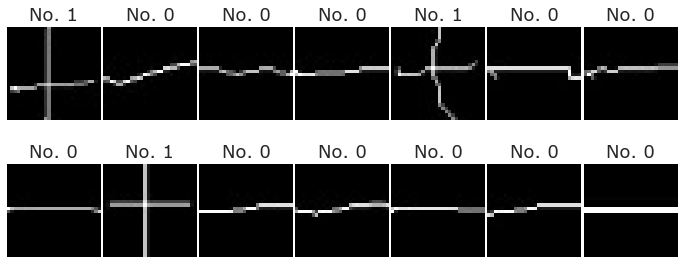

In [107]:
rand_14 = np.random.randint(0, operators_features.shape[0],14)
sample_digits = operators_features[rand_14]
sample_labels = operators_labels[rand_14]

num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.01}, squeeze=True)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %s' % sample_labels[image_index])
plt.show()
plt.close()

In [108]:
train_digits = ''
test_digits = ''
train_labels = ''
test_labels = ''
# train_digits, test_digits, train_labels, test_labels = train_test_split(mnist_ops_features, mnist_ops_labels, test_size=0.2, random_state=101)

train_digits, test_digits, train_labels, test_labels = train_test_split(operators_features, operators_labels, test_size=0.2, random_state=101)

In [109]:
train_digits.shape, test_digits.shape, train_labels.shape, test_labels.shape

((49888, 28, 28), (12472, 28, 28), (49888,), (12472,))

'12'

In [110]:
# some variables to help with pre-processing...
image_height, image_width = train_digits.shape[1], train_digits.shape[2]
num_channels = 1  # we have grayscale images
input_shape = image_height * image_width * num_channels
image_height, image_width, num_channels, input_shape

(28, 28, 1, 784)

In [111]:
# re-shape the images data
train_data = np.reshape(train_digits,(train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits,(test_digits.shape[0],image_height, image_width, num_channels))
train_data.shape, test_data.shape

((49888, 28, 28, 1), (12472, 28, 28, 1))

In [112]:
# re-scale the images data to values between (0.0 and 255.0] (i.e. 0.0 <= value < 255.0)
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

In [113]:
# one-hot-encode the labels
num_classes = 3
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((49888, 3), (12472, 3))

In [114]:
train_data.shape, train_labels_cat.shape, test_data.shape, test_labels_cat.shape

((49888, 28, 28, 1), (49888, 3), (12472, 28, 28, 1), (12472, 3))

In [115]:
# shuffle the training dataset & set aside val_perc % of rows as validation data
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

# randomly sorted!
train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]

# now we will set-aside val_perc% of the train_data/labels as cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))

# first pick validation set
val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]

train_data2.shape, train_labels_cat2.shape, val_data.shape, val_labels_cat.shape, test_data.shape, test_labels.shape

((44900, 28, 28, 1),
 (44900, 3),
 (4988, 28, 28, 1),
 (4988, 3),
 (12472, 28, 28, 1),
 (12472,))

In [116]:
# some globals
num_features = train_data.shape[1]
num_epochs = 15
batch_size = 64

## Helper Functions

In [117]:
# a utility function that plots the losses and accuracies for training & validation sets across our epochs
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

In [118]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time
    
    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN
    
    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)
    
    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')

## Model Development

Our model will have the following configuration:
* 3 `Conv2d` layers, each with 32, 64 and 64 filters and `relu` activation functions and a `(3,3)` kernel size, and `padding='same'`
* We follow each Conv2d layer with a `MaxPooling2d` layer with a `(2,2)` pool size
* Finally, we have a `Dense` layer with 512 nodes and `relu` activation.
* The output `Dense` layer has 10 nodes (for the 10 digits) and a `softmax` activation function (for a a multi-class classification problem)
* We use the `categorical-crossentropy` loss and the `adam` optimizer.

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [120]:
def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(image_height, image_width, num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [121]:
model = build_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [122]:
start_time = time.time()
history = model.fit(train_data2, train_labels_cat2, epochs=15, batch_size=64,
                    validation_data=(val_data, val_labels_cat))
end_time = time.time()
print_time_taken(start_time, end_time)

Train on 44900 samples, validate on 4988 samples
Epoch 1/15
44900/44900 [==============================] - 36s 798us/sample - loss: 0.0354 - accuracy: 0.9890 - val_loss: 0.0048 - val_accuracy: 0.9990
Epoch 2/15
44900/44900 [==============================] - 37s 816us/sample - loss: 0.0081 - accuracy: 0.9987 - val_loss: 8.5234e-04 - val_accuracy: 0.9998
Epoch 3/15
44900/44900 [==============================] - 38s 851us/sample - loss: 0.0043 - accuracy: 0.9993 - val_loss: 2.6722e-04 - val_accuracy: 0.9998
Epoch 4/15
44900/44900 [==============================] - 40s 899us/sample - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 5/15
44900/44900 [==============================] - 42s 935us/sample - loss: 0.0022 - accuracy: 0.9994 - val_loss: 2.6127e-05 - val_accuracy: 1.0000
Epoch 6/15
44900/44900 [==============================] - 34s 768us/sample - loss: 8.9362e-04 - accuracy: 0.9998 - val_loss: 6.9182e-05 - val_accuracy: 1.0000
Epoch 7/15
44900/44900 [=

**NOTE:** With this CNN, we get a training accuracy of 99.7% (and validation accuracy of 99.3%) - see last line of output above. 

Next, let us view plots of train & validation accuracies vs epochs and train & validation losses vs epochs. We will use the `show_plots()` helper function coded above which presents these charts in a 1x2 grid.

In [66]:
show_plots(history.history)

KeyError: 'acc'

The plots suggests that this model is overfitting the training data after 3-4 epochs: 
* We can see from the top-left plot that the training loss is falling smoothly towards zero, however the test loss falls for some epochs and then rises somewhat after the 4th epoch.
* Also in the accuracy plots (top-right), we observe that the training accuracu rises towards 100%, whereas the validation accuracy flattens out after around 4 epochs - at a value around 99%. 
* This is a typical behavior of an overfitting model. However our validation loss is not significantly lesser than our training loss, indicating that the model is overfitting only slightly.

Let us see how our model is performing against test data that it has not _seen_ so far. 

In [123]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, batch_size=batch_size)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

12472/12472 [==============================] - 1s 111us/sample - loss: 2.2318e-07 - accuracy: 1.0000
Test loss: 0.0000 accuracy: 1.0000


**Observation:** We get a test accuracy of 99.3% with the test data, which is a great metric! Our model is generalizing well (i.e. the accuracy score is good on data that it has not seen before). 
## Predictions
Next, let us run some predictions using this model & test data.

In [124]:
# now let's predict the outcomes of our model
kr_test_pred = model.predict(test_data)
# NOTE: each member of kr_test_pred would be a (1,10) array 
# each index of the array holds the probability that the model thinks it is the digit at that offset
# example for digit [??] -> [???]
# The index which holds the maximum probability value is the predictioon

In [125]:
# view first 20 - both predicted & actual
np.argmax(kr_test_pred, axis=1)[:25]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2,
       1, 0, 1])

In [126]:
np.argmax(test_labels_cat,axis=1)[:25]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2,
       1, 0, 1])

In [127]:
# how many mismatches?
(np.argmax(kr_test_pred, axis=1) != np.argmax(test_labels_cat,axis=1)).sum()

0

So, we have around 80 of 10,000 mismatched records in our test data. Not bad.

In [128]:
#save our model
model.save('app/static/models/operators_cnn.h5')

# Summary
* In this workbook we created a CNN with Keras to classify the MNIST digits.
* We were able to achieve test accuracy of 99%, though our model was overfitting slightly.

# <center> - - END - - </center>